In [2]:
!pip install pandas

In [3]:
"""
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

options = Options()
driver = webdriver.Chrome("C:\Program Files\chromedriver_linux64")
download_url = 'https://www.boatrace.jp/owpc/pc/extra/data/download.html'
driver.get(download_url)
time.sleep(7)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
datas = soup.find('ul', attrs={'class':'data_list h-mt15'})
datas_url = datas.find_all('a')
for data_url in datas_url:
    home_url = 'https://www.boatrace.jp'
    data_url = home_url + data_url.get('href')
    driver.get(data_url)
    time.sleep(5)
driver.close()
"""

In [7]:
"""
import time
from selenium import webdriver #Selenium Webdriverをインポートする
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Serviceオブジェクトを作成
service = Service(ChromeDriverManager().install())

# Serviceオブジェクトを使用してWebDriverを作成
options = Options()
driver = webdriver.Chrome(service=service, options=options)

hall_pref="大阪府"
hall_name="123N+松原"

hp_url=f"https://ana-slo.com/ホールデータ/{hall_pref}/"

time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド

search_box = driver.find_element_by_name("q") #DOM操作
 
search_box.send_keys('NakamuraBlog') #Google検索ボックス内に「NakamuraBlog」と入力
search_box.submit() #Google検索ボタンのクリック 
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
research_result = driver.find_element_by_partial_link_text("nkmrdai") #検索結果hrefタグ内に「nkmradai」があるリンクを探す
research_result.click() #クリックする。 #このタイミングでNakamuraBlogのトップページが開かれたらOK
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
driver.quit() #Chromeブラウザを閉じる
"""

## アナスロデータ収集

### 単体

In [42]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


shop_pref = "兵庫県"
shop_name = "オール湊川"
# 正規表現パターンを定義
pattern = r'\([^)]*\)'

try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:365]:
        days_list.append(a_element.text)
    print(days_list)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    pass


['2023/09/24(日)', '2023/09/23(土)', '2023/09/22(金)', '2023/09/21(木)', '2023/09/20(水)', '2023/09/19(火)', '2023/09/18(月)', '2023/09/17(日)', '2023/09/16(土)', '2023/09/15(金)', '2023/09/14(木)', '2023/09/13(水)', '2023/09/12(火)', '2023/09/11(月)', '2023/09/10(日)', '2023/09/09(土)', '2023/09/08(金)', '2023/09/07(木)', '2023/09/06(水)', '2023/09/05(火)', '2023/09/03(日)', '2023/09/02(土)', '2023/09/01(金)', '2023/08/31(木)', '2023/08/30(水)', '2023/08/29(火)', '2023/08/28(月)', '2023/08/27(日)', '2023/08/26(土)', '2023/08/25(金)', '2023/08/24(木)', '2023/08/23(水)', '2023/08/22(火)', '2023/08/21(月)', '2023/08/20(日)', '2023/08/19(土)', '2023/08/18(金)', '2023/08/17(木)', '2023/08/16(水)', '2023/08/14(月)', '2023/08/13(日)', '2023/08/12(土)', '2023/08/11(金)', '2023/08/10(木)', '2023/08/09(水)', '2023/08/08(火)', '2023/08/06(日)', '2023/08/05(土)', '2023/08/04(金)', '2023/08/03(木)', '2023/08/02(水)', '2023/08/01(火)', '2023/07/31(月)', '2023/07/30(日)', '2023/07/29(土)', '2023/07/28(金)', '2023/07/27(木)', '2023/07/26(水)', '2023/07/25(火

KeyboardInterrupt: 

In [42]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import os

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


# 正規表現パターンを定義
pattern = r'\([^)]*\)'
shop_pref = "兵庫県"
get_shop_url = f"https://ana-slo.com/ホールデータ/{shop_pref}/"
# ウェブページをダウンロード
response = requests.get(get_shop_url)
# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')
wait_time = random.uniform(3, 5)
time.sleep(wait_time)

table_element = soup.find('div', class_="table-body")
div_elements = table_element.findAll("div", class_="table-row")
shop_list = []

for div_element in div_elements:
    # 1つ目の<div>内の<a>タグのテキストを取得
    shop_name = div_element.find('div', class_='table-data-cell').a.text
    # 2つ目の<div>内のテキストを取得
    shop_city = div_element.find_all('div', class_='table-data-cell')[1].text
    print(shop_name, shop_city)
    shop_list.append(shop_name)
#     if "神戸市" in shop_city:
#         shop_list.append(shop_name)

# 現在のディレクトリ内のファイルをリストアップ
file_list = os.listdir()

# CSVファイルのみを選択
csv_files = [filename for filename in file_list if filename.endswith('.csv')]
exist_shop = []
# 結果を表示
for csv_file in csv_files:
    exist_shop = csv_file.replace(".csv", "")
    if exist_shop in shop_list:
        shop_list.remove(exist_shop)
    else:
        continue

for shop_name in shop_list:
    try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:190]:
        days_list.append(a_element.text)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                #ARTとART確率が含まれる場合
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow
        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            gogog_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 5))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    continue


## 特徴量作成、可視化

回転数不足 の割合 : 0.5593665833793037
設定1 の割合 : 0.19294545218548204
設定2 の割合 : 0.08329817957620794
設定3 の割合 : 0.05526170620112276
設定4 の割合 : 0.06438004997241782
設定5 の割合 : 0.0336827075964565
設定6 の割合 : 0.011065321089009313


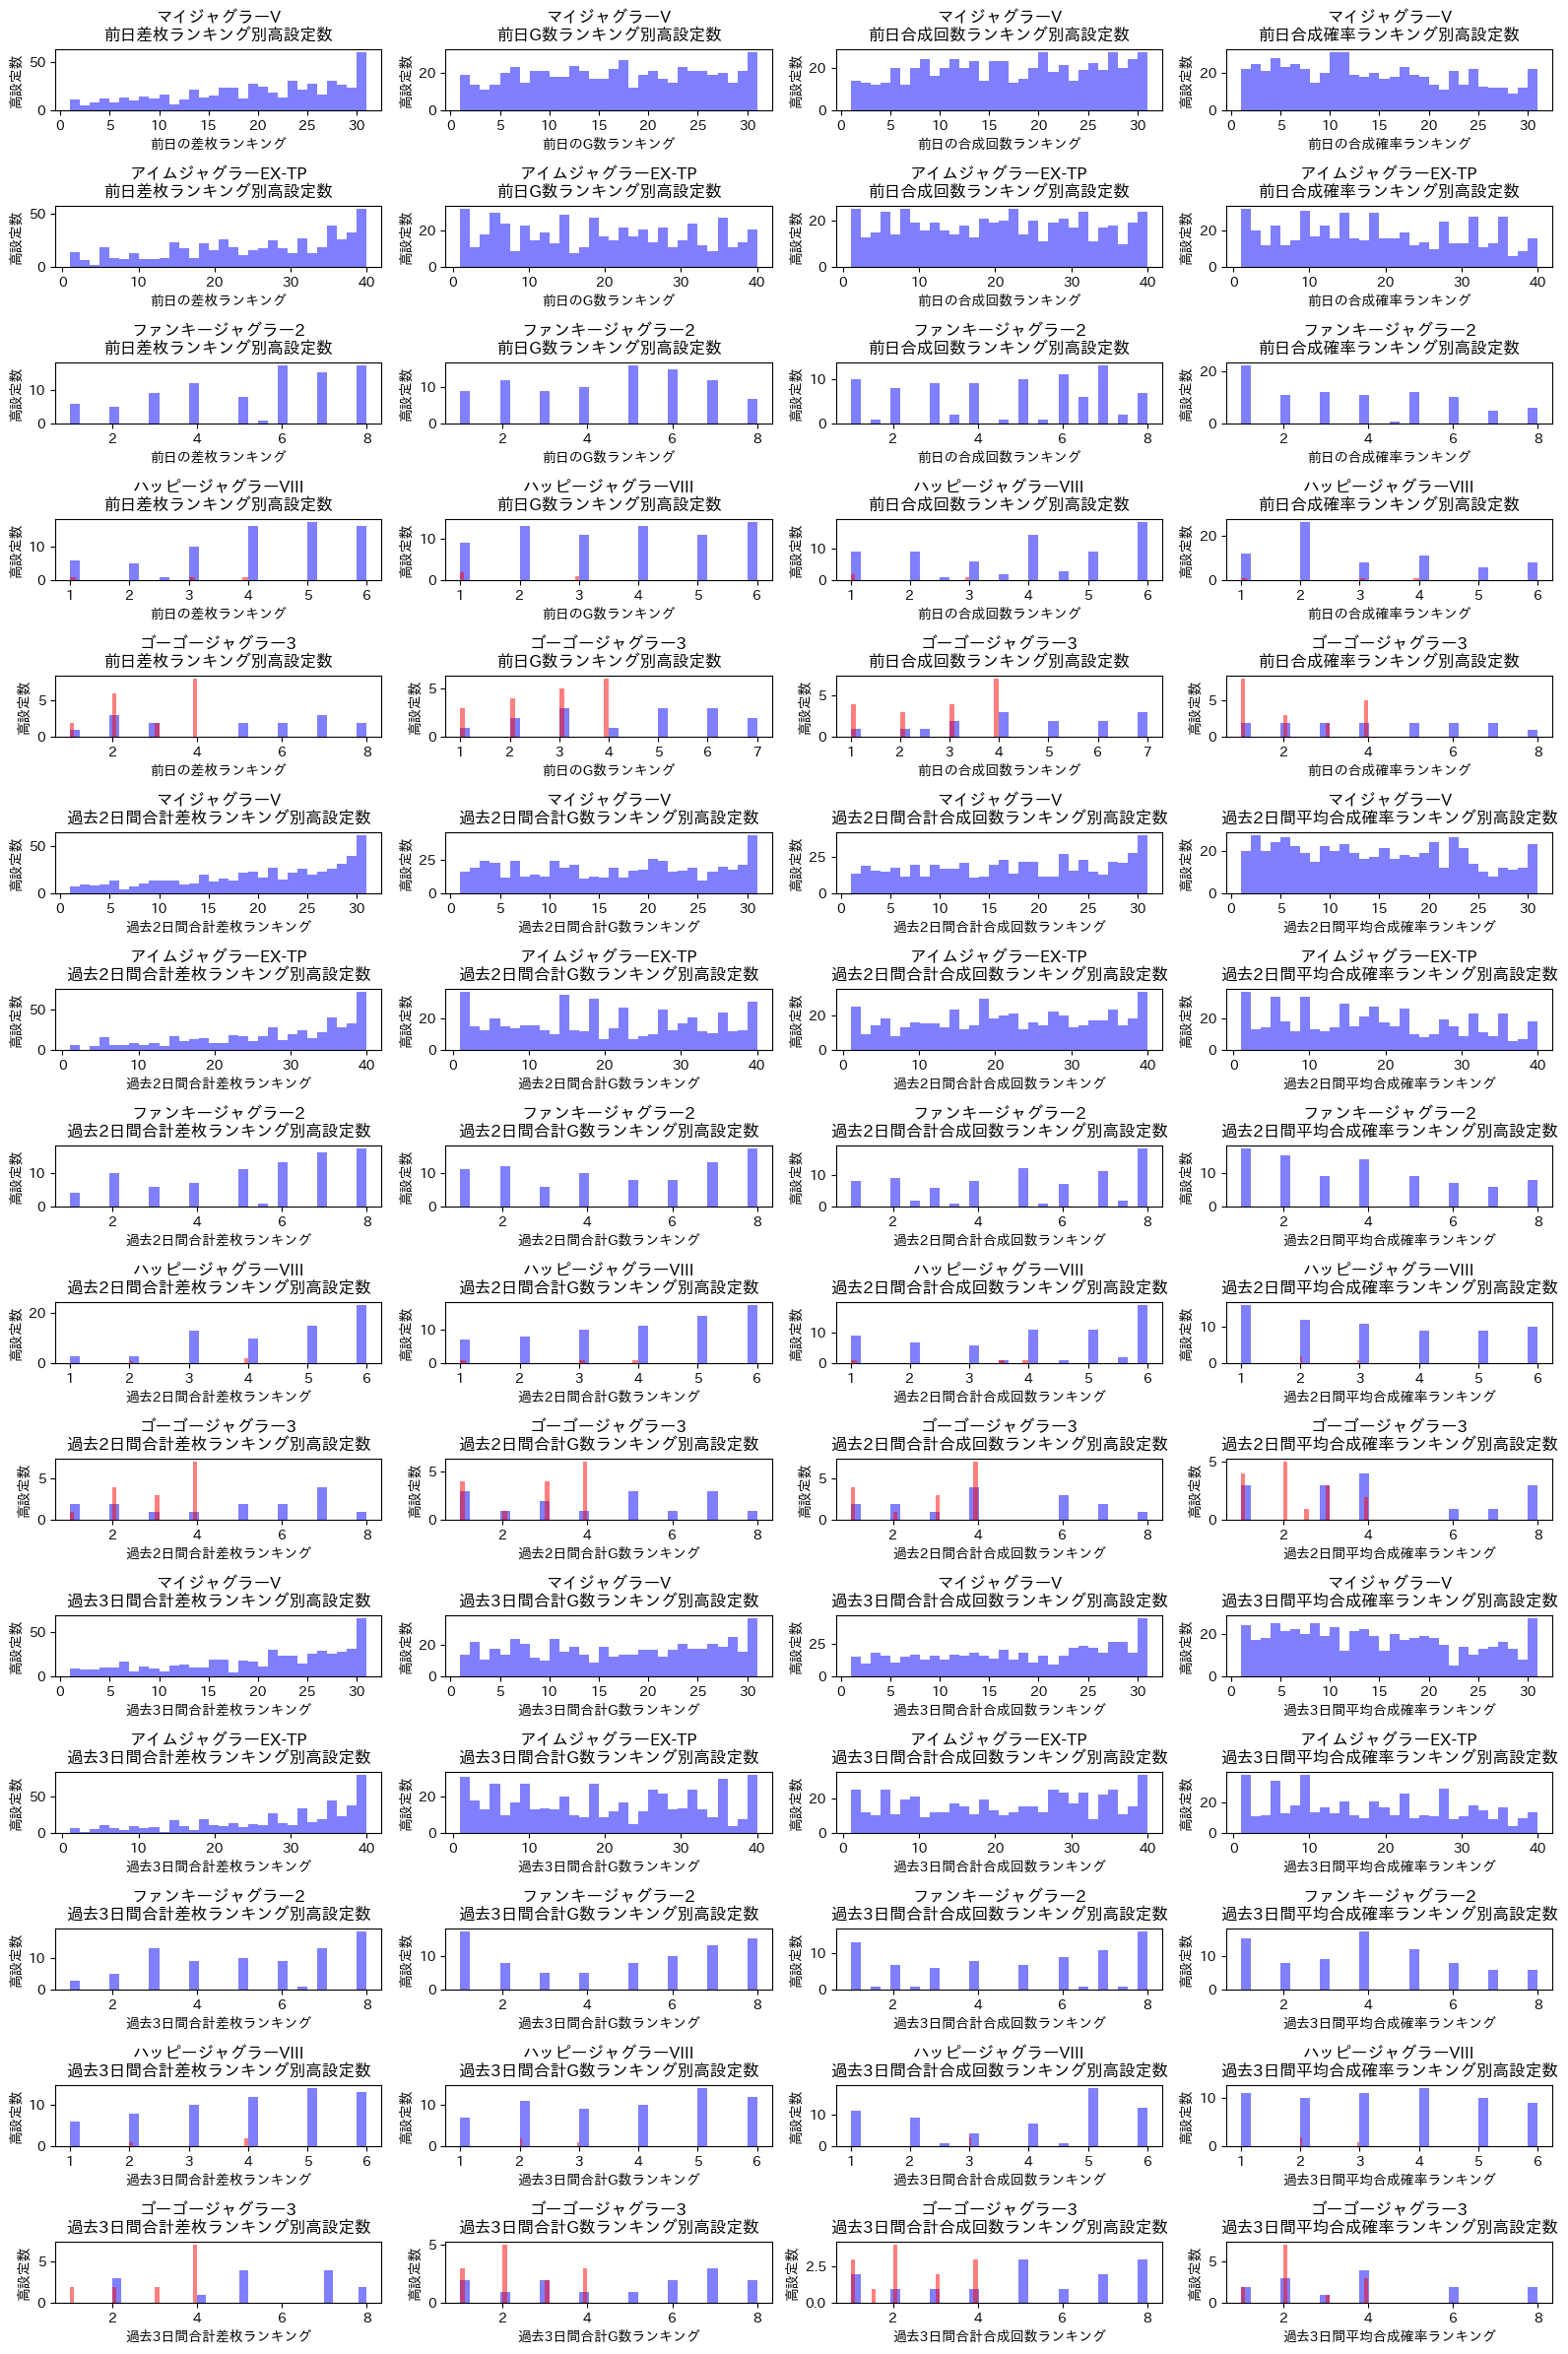

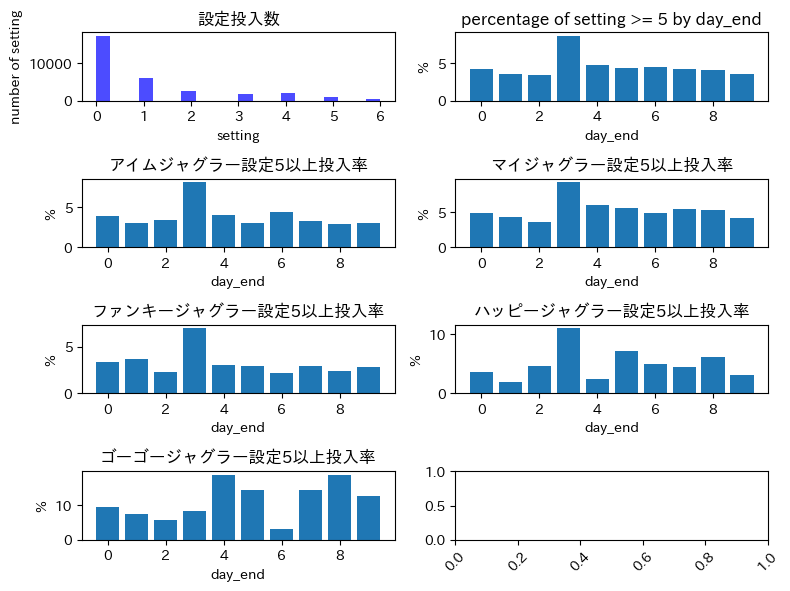

In [286]:
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
pd.set_option('display.max_rows', 10000)
shop_name="オール湊川"
main_data=pd.read_csv(f"CSV一覧/{shop_name}.csv", encoding="shift-jis")

#分数を変換
main_data['合成確率'] = main_data['合成確率'] .str.replace('1/','')
main_data['合成確率']=main_data['合成確率'].astype('float64')
main_data['BB確率'] = main_data['BB確率'] .str.replace('1/','')
main_data['BB確率']=main_data['BB確率'].astype('float64')
main_data['RB確率'] = main_data['RB確率'] .str.replace('1/','')
main_data['RB確率']=main_data['RB確率'].astype('float64')

#一旦すべて設定１とする
main_data['setting'] = 1
#アイムジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 399.6) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 331.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 315.1) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP") & (main_data["ブドウ確率"]<5.90),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#マイジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 385.5) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 336.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 290.0) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 268.6) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.85)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 229.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.80)|(main_data["BB確率"]<=266.4)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ファンキージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 407.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 366.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 322.8) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 299.3) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.88),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 262.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.83),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ハッピージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=263.2)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ゴーゴージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.0)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=258.0)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=257.0)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う

#時刻データに変換
main_data['日付'] = pd.to_datetime(main_data['日付'])
main_data['day_end'] = main_data['日付'].astype(str).str[-1].astype(int) #日付末尾

main_data['合成回数']=main_data['BB回数']+main_data['RB回数']

# 同じ機種名と同じ日付の台数を数えて新しい列に代入
main_data['機種台数'] = main_data.groupby(['機種名', '日付'])['台番号'].transform('count')
machine_nums_list = main_data.groupby('機種名')['機種台数'].unique().reset_index(name='機種台数リスト')
# 前日の差枚、G数、BB確率、RB確率を計算して新しい列に追加
# main_data['前日の差枚'] = main_data.groupby("台番号")['差枚'].shift(-1)
# main_data['前日のG数'] = main_data.groupby("台番号")['G数'].shift(-1)
# main_data['前日のBB確率'] = main_data.groupby("台番号")['BB確率'].shift(-1)
# main_data['前日のRB確率'] = main_data.groupby("台番号")['RB確率'].shift(-1)
main_data['1日後'] = main_data['日付'] + pd.Timedelta(days=1)
main_data['2日後'] = main_data['日付'] + pd.Timedelta(days=2)
main_data['3日後'] = main_data['日付'] + pd.Timedelta(days=3)
#前日のランキングを当日の列に反映
ranking_columns=['G数', '差枚', '合成回数', '合成確率']
for ranking_column in ranking_columns:
    main_data[f'{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[ranking_column].rank(ascending=False)
#1日前、2日前、3日前のデータを結合
main_data = main_data.merge(main_data[['1日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率', 'G数ランキング', '差枚ランキング', '合成回数ランキング', '合成確率ランキング']], left_on=['日付', '機種名', '台番号'], right_on=['1日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['1日後_x', '1日後_y', '差枚ランキング_x', 'G数ランキング_x', '合成回数ランキング_x', '合成確率ランキング_x'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
        'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '2日後', '3日後',
        '前日のG数', '前日の差枚', '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング','前日の合成確率ランキング']

main_data = main_data.merge(main_data[['2日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率']], left_on=['日付', '機種名', '台番号'], right_on=['2日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['2日後_x', '2日後_y'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '3日後', '前日のG数', '前日の差枚',  '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング',
       '前日の合成確率ランキング', '2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率']

main_data = main_data.merge(main_data[['3日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率']], left_on=['日付', '機種名', '台番号'], right_on=['3日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['3日後_x', '3日後_y'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '前日のG数', '前日の差枚',  '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング',
       '前日の合成確率ランキング', '2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率', '3日前のG数', '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率', '3日前のBB確率', '3日前のRB確率']

#〇〇日前の合計または平均を計算
total_items=['G数', '差枚', '合成回数']
avarage_items=['合成確率']
for i in range(1,3):
    for item in total_items:
        prev_total_df=main_data[f'2日前の{item}']
        for j in range(i-1):
            prev_total_df=prev_total_df+main_data[f"{j+3}日前の{item}"]
        main_data[f"{item}過去{i+1}日間合計"]=main_data[f"前日の{item}"]+prev_total_df
    for item in avarage_items:
        prev_total_df=main_data[f'2日前の{item}']
        for j in range(i-1):
            prev_total_df=prev_total_df+main_data[f"{j+3}日前の{item}"]
        main_data[f"{item}過去{i+1}日間平均"]=(main_data[f"前日の{item}"]+prev_total_df)/(i+1)

#過去〇日間を用いたランキングを作成
ranking_columns_total=['G数', '差枚', '合成回数']
ranking_columns_avarage=['合成確率']
for i in range(2):
    for ranking_column in ranking_columns_total:
        main_data[f'過去{i+2}日間合計{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[f'{ranking_column}過去{i+2}日間合計'].rank(ascending=False)
    for ranking_column in ranking_columns_avarage:
        main_data[f'過去{i+2}日間平均{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[f'{ranking_column}過去{i+2}日間平均'].rank(ascending=False)

main_data.to_csv(f"{shop_name}-update.csv", index=False, encoding = "shift-jis")


#可視化
machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
colors=['blue', 'red', 'black', 'green']
# サブプロットを配置
fig, axes = plt.subplots(15, 4, figsize=(16, 24))

#過去何日前か
for prev_day in range(1, 4):
    if prev_day==1:
        samai_title='前日差枚ランキング別高設定数'
        game_title='前日G数ランキング別高設定数'
        total_num_title='前日合成回数ランキング別高設定数'
        total_prob_title='前日合成確率ランキング別高設定数'
        samai_column='前日の差枚ランキング'
        game_column='前日のG数ランキング'
        total_num_column='前日の合成回数ランキング'
        total_prob_column='前日の合成確率ランキング'
    else:
        samai_title=f'過去{prev_day}日間合計差枚ランキング別高設定数'
        game_title=f'過去{prev_day}日間合計G数ランキング別高設定数'
        total_num_title=f'過去{prev_day}日間合計合成回数ランキング別高設定数'
        total_prob_title=f'過去{prev_day}日間平均合成確率ランキング別高設定数'
        samai_column=f'過去{prev_day}日間合計差枚ランキング'
        game_column=f'過去{prev_day}日間合計G数ランキング'
        total_num_column=f'過去{prev_day}日間合計合成回数ランキング'
        total_prob_column=f'過去{prev_day}日間平均合成確率ランキング'
        
    for i, machine_name in enumerate(machine_names):
        #対象機種かつ高設定の台のみピックアップする
        #対象日を全てにしたい場合
        filtered_df = main_data[(main_data['機種名'] == machine_name) & (main_data['setting'] >= 5)]
        # display(filtered_df)
        #対象日をイベ日だけにしたい場合
        # target_day_end=8
        # filtered_df = main_data[(main_data['機種名'] == machine_name) & (main_data['setting'] >= 5) & (main_data['day_end'] == target_day_end)]
        #対象機種の機種台数リストを作成
        try:
            target_machine_num_list=machine_nums_list[machine_nums_list['機種名']==machine_name]['機種台数リスト'].values[0]
        except Exception as e:
            print(e)
            pass
        for j, machine_num in enumerate(target_machine_num_list):
            try:
                target_num_filtered_df=filtered_df[filtered_df['機種台数']==machine_num]
                # ヒストグラムを作成し配置
                axes[(i+5*(prev_day-1)), 0].hist(target_num_filtered_df[samai_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 0].set_xlabel(samai_column)
                axes[(i+5*(prev_day-1)), 0].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 0].set_title(f'{machine_name}\n{samai_title}')
                
                axes[(i+5*(prev_day-1)), 1].hist(target_num_filtered_df[game_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 1].set_xlabel(game_column)
                axes[(i+5*(prev_day-1)), 1].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 1].set_title(f'{machine_name}\n{game_title}')
                
                axes[(i+5*(prev_day-1)), 2].hist(target_num_filtered_df[total_num_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 2].set_xlabel(total_num_column)
                axes[(i+5*(prev_day-1)), 2].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 2].set_title(f'{machine_name}\n{total_num_title}')
                
                axes[(i+5*(prev_day-1)), 3].hist(target_num_filtered_df[total_prob_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 3].set_xlabel(total_prob_column)
                axes[(i+5*(prev_day-1)), 3].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 3].set_title(f'{machine_name}\n{total_prob_title}')
            except Exception as e:
                pass
            
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()
#図を保存
plt.savefig(f'{shop_name}-設定投入傾向.png', dpi=300)

#設定の比率
n_target0, n_target1,n_target2,n_target3,n_target4,n_target5,n_target6= len(main_data[main_data['setting'] == 0]), len(main_data[main_data['setting'] == 1]) , len(main_data[main_data['setting'] == 2]), len(main_data[main_data['setting'] == 3]), len(main_data[main_data['setting'] == 4]), len(main_data[main_data['setting'] == 5]), len(main_data[main_data['setting'] == 6])
n_all = n_target0+n_target1+n_target2+n_target3+n_target4+n_target5+n_target6
print('回転数不足 の割合 :', n_target0/n_all) # target0の割合
print('設定1 の割合 :', n_target1/n_all) # target1の割合
print('設定2 の割合 :', n_target2/n_all) # target2の割合
print('設定3 の割合 :', n_target3/n_all) # target3の割合
print('設定4 の割合 :', n_target4/n_all) # target4の割合
print('設定5 の割合 :', n_target5/n_all) # target5の割合
print('設定6 の割合 :', n_target6/n_all) # target6の割合

# サブプロットを配置
fig, axes = plt.subplots(4, 2, figsize=(8, 6))

# ヒストグラムを作成し配置
axes[0, 0].hist(main_data["setting"], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel("setting")
axes[0, 0].set_ylabel("number of setting")
axes[0, 0].set_title("設定投入数")

#全データの中で設定5以上の投入率を調べる
# "setting" 列が5以上の行を抽出
setting_upperfive_df = main_data[main_data['setting'] >= 5]
# "day_end" 列ごとに条件を満たす行の数を計算
upperfize_by_day = setting_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = main_data.groupby('day_end')['setting'].count()

percentage_by_day = upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[0, 1].bar(x, y)
axes[0, 1].set_xlabel('day_end')
axes[0, 1].set_ylabel("%")
axes[0, 1].set_title('percentage of setting >= 5 by day_end')
plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる

#アイムジャグラーの高設定投入率を調べる
im_all_df = main_data[main_data["機種名"]=="アイムジャグラーEX-TP"]
im_upperfive_df = im_all_df[im_all_df["setting"]>=5]

upperfize_by_day = im_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = im_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 0].bar(x, y)
axes[1, 0].set_xlabel('day_end')
axes[1, 0].set_ylabel("%")
axes[1, 0].set_title('アイムジャグラー設定5以上投入率')

#マイジャグラーの高設定投入率を調べる
my_all_df = main_data[main_data["機種名"]=="マイジャグラーV"]
my_upperfive_df = my_all_df[my_all_df["setting"]>=5]

upperfize_by_day = my_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = my_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 1].bar(x, y)
axes[1, 1].set_xlabel('day_end')
axes[1, 1].set_ylabel("%")
axes[1, 1].set_title('マイジャグラー設定5以上投入率')

#ファンキージャグラーの高設定投入率を調べる
fanky_all_df = main_data[main_data["機種名"]=="ファンキージャグラー2"]
fanky_upperfive_df = fanky_all_df[fanky_all_df["setting"]>=5]

upperfize_by_day = fanky_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = fanky_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day

# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 0].bar(x, y)
axes[2, 0].set_xlabel('day_end')
axes[2, 0].set_ylabel("%")
axes[2, 0].set_title('ファンキージャグラー設定5以上投入率')

#ハッピージャグラーの高設定投入率を調べる
happy_all_df = main_data[main_data["機種名"]=="ハッピージャグラーVIII"]
happy_upperfive_df = happy_all_df[happy_all_df["setting"]>=5]

upperfize_by_day = happy_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = happy_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 1].bar(x, y)
axes[2, 1].set_xlabel('day_end')
axes[2, 1].set_ylabel("%")
axes[2, 1].set_title('ハッピージャグラー設定5以上投入率')

#ゴーゴージャグラーの高設定投入率を調べる
gogo_all_df = main_data[main_data["機種名"]=="ゴーゴージャグラー3"]
gogo_upperfive_df = gogo_all_df[gogo_all_df["setting"]>=5]

upperfize_by_day = gogo_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = gogo_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[3, 0].bar(x, y)
axes[3, 0].set_xlabel('day_end')
axes[3, 0].set_ylabel("%")
axes[3, 0].set_title('ゴーゴージャグラー設定5以上投入率')
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()

# 図を保存
plt.savefig(f'{shop_name}-設定投入率.png', dpi=300)
plt.show()

# zero_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='Count of setting = 0 by day_end')
# plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
# plt.show()

In [157]:
import openpyxl
from openpyxl.styles import PatternFill

# カラムの制限をなくす（全てのカラムを表示）
pd.set_option('display.max_columns', None)

# 日付の末尾がイベ日である行を抽出
target_dates = main_data[main_data['day_end'] == 9]['日付']
machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
# Excelファイルに保存
with pd.ExcelWriter(f'{shop_name}-data.xlsx', engine='openpyxl') as writer:
    for machine_name in machine_names:
        try:
            jag_df = main_data[main_data['機種名'] == machine_name]
            filtered_jag_df = jag_df[jag_df['日付'].isin(target_dates) | jag_df['日付'].isin(target_dates - pd.DateOffset(
                days=1)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=2)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=3))]
            filtered_jag_df_event = jag_df[jag_df['日付'].isin(target_dates)]
    
            #日付を変更する際の注意を解消するためにコピーを作成
            jag_df = jag_df.copy()
            filtered_jag_df = filtered_jag_df.copy()
            filtered_jag_df_event = filtered_jag_df_event.copy()
    
            jag_df['日付'] = jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
            filtered_jag_df['日付'] = filtered_jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
            filtered_jag_df_event['日付'] = filtered_jag_df_event['日付'].dt.strftime('%Y年%m月%d日(%a)')
            pivot_table_all_samai = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
    
            pivot_table_all_reg = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB確率')
    
            pivot_table_all_big_count=jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'BB回数')
            pivot_table_all_reg_count=jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB回数')
    
            pivot_table_all_gassan_count=pivot_table_all_big_count+pivot_table_all_reg_count
    
            pivot_table_all_game_count= jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'G数')
    
            pivot_table_all_setting = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
    
            pivot_table_sorted_all_setting = pivot_table_all_setting.sort_values(
                by = '日付', ascending = False)

            pivot_table_sorted_all_samai = pivot_table_all_samai.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_reg =pivot_table_all_reg.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_gassan_count= pivot_table_all_gassan_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_game_count=pivot_table_all_game_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_all_with_totals = pivot_table_sorted_all_samai.copy()

            pivot_table_all_with_totals.loc['合計'] = pivot_table_all_with_totals.sum()
    
            pivot_table_samai = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
    
            pivot_table_sorted_samai = pivot_table_samai.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_samai_event = filtered_jag_df_event.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
            pivot_table_sorted_samai_event = pivot_table_samai_event.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_event_with_totals = pivot_table_sorted_samai_event.copy()
            pivot_table_event_with_totals.loc['合計'] = pivot_table_event_with_totals.sum()
    
            pivot_table_game_count = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'G数')
            pivot_table_sorted_game_count = pivot_table_game_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_gassan = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '合成確率')
            pivot_table_sorted_gassan = pivot_table_gassan.sort_values(
                by = '日付', ascending = False)

            pivot_table_reg = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB確率')
            pivot_table_sorted_reg = pivot_table_reg.sort_values(by='日付', ascending=False)
    
            pivot_table_setting = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
            pivot_table_sorted_setting = pivot_table_setting.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_setting_event = filtered_jag_df_event.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
            pivot_table_sorted_setting_event = pivot_table_setting_event.sort_values(
                by = '日付', ascending = False)
            pivot_table_sorted_setting_event = pd.DataFrame(
                pivot_table_sorted_setting_event)
            setting = 5
            count_of_values_above_condition = pivot_table_sorted_setting_event.applymap(
                lambda x: 1 if x >= setting else 0).sum()
            # 新しい行を追加
            pivot_table_sorted_setting_event = pd.concat(
                [pivot_table_sorted_setting_event, count_of_values_above_condition.to_frame().T], ignore_index = False)
            pivot_table_sorted_setting_event.index = pivot_table_sorted_setting_event.index.to_list()[
                : -1] + ['高設定数']
    
            pivot_table_sorted_all_samai.to_excel(
                writer, sheet_name = f'{machine_name}-全データの差枚', index = True)
            pivot_table_sorted_all_setting.to_excel(
                writer, sheet_name = f'{machine_name}-全データの設定', index = True)
            pivot_table_sorted_all_reg.to_excel(
                writer, sheet_name = f'{machine_name}-全データのREG確率', index=True)
            pivot_table_sorted_all_gassan_count.to_excel(
                writer, sheet_name = f'{machine_name}-全データのボーナス合算回数', index=True)
            pivot_table_sorted_all_game_count.to_excel(
                writer, sheet_name = f'{machine_name}-全データのG数', index=True)
    
            filtered_jag_df.to_excel(writer, sheet_name='三日前まで含めた全項目データ', index=False)
    
            pivot_table_event_with_totals.to_excel(
                writer, sheet_name = f'{machine_name}-eventのみの差枚', index = True)
            pivot_table_sorted_setting_event.to_excel(
                writer, sheet_name = f'{machine_name}-eventのみの設定', index = True)
    
            pivot_table_sorted_samai.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めた差枚', index = True)
    
            pivot_table_sorted_game_count.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたG数', index = True)
    
            pivot_table_sorted_reg.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたRB確率', index = True)
    
            pivot_table_sorted_gassan.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めた合算確率', index = True)
    
            pivot_table_sorted_setting.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたsetting', index = True)

            workbook = writer.book
            worksheet_all_samai = writer.sheets[f'{machine_name}-全データの差枚']
            worksheet_all_reg = writer.sheets[f'{machine_name}-全データのREG確率']
            worksheet_all_gassan_count= writer.sheets[f'{machine_name}-全データのボーナス合算回数']
            worksheet_all_game_count= writer.sheets[f'{machine_name}-全データのG数']
            worksheet_all_setting = writer.sheets[f'{machine_name}-全データの設定']
            worksheet_setting = writer.sheets[f'{machine_name}-三日前まで含めたsetting']
            worksheet_samai = writer.sheets[f'{machine_name}-三日前まで含めた差枚']
            worksheet_game_count = writer.sheets[f'{machine_name}-三日前まで含めたG数']
            worksheet_reg_probability = writer.sheets[f'{machine_name}-三日前まで含めたRB確率']
            worksheet_total_probability = writer.sheets[f'{machine_name}-三日前まで含めた合算確率']
            worksheet_setting_event = writer.sheets[f'{machine_name}-eventのみの設定']
            worksheet_samai_event = writer.sheets[f'{machine_name}-eventのみの差枚']
    
            # 値が5以上のセルを赤く塗りつぶす
            red_fill = PatternFill(start_color='FFFF0000',
                                   end_color = 'FFFF0000', fill_type = 'solid')
            # 全データ
            for cell in worksheet_all_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_sorted_all_setting) + 1, max_col=len(pivot_table_sorted_all_setting.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_all_samai.cell(high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_reg.cell(high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_game_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_gassan_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill

            # イベントの三日前まで含めた
            for cell in worksheet_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting) + 1, max_col=len(pivot_table_sorted_setting.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_samai.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_game_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_reg_probability.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_total_probability.cell(
                            high_setting_row, high_setting_column).fill = red_fill
    
    
            # イベントのみ
            for cell in worksheet_setting_event.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting_event)+1, max_col=len(pivot_table_sorted_setting_event.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_samai_event.cell(
                            high_setting_row, high_setting_column).fill = red_fill
        except Exception as e:
            print(e)
            continue


1
1
1
1
1
cannot set a frame with no defined columns


## 機械学習

日付       機種名  台番号    G数    差枚  BB回数  RB回数   合成確率   BB確率   RB確率   
40 2023-09-24  マイジャグラーV  628  4681  -703    16    10  180.0  292.6  468.1  \
41 2023-09-24  マイジャグラーV  630  5746    39    21    21  136.8  273.6  273.6   
42 2023-09-24  マイジャグラーV  631  5026   550    20    16  139.6  251.3  314.1   
43 2023-09-24  マイジャグラーV  632  4777  -492    16    17  144.8  298.6  281.0   
44 2023-09-24  マイジャグラーV  633  5465   314    19    19  143.8  287.6  287.6   
45 2023-09-24  マイジャグラーV  635  2293  -419     8     3  208.5  286.6  764.3   
46 2023-09-24  マイジャグラーV  636  4816  -375    17    11  172.0  283.3  437.8   
47 2023-09-24  マイジャグラーV  637  5922 -2078    15    16  191.0  394.8  370.1   
48 2023-09-24  マイジャグラーV  638  4274   439    21    10  137.9  203.5  427.4   
49 2023-09-24  マイジャグラーV  650  4887   306    20    14  143.7  244.3  349.1   

       ブドウ確率  setting  day_end  合成回数  機種台数   前日のG数   前日の差枚  前日のBB回数  前日のRB回数   
40  5.886282        1        4    26    31  7296.0  1878.0     33.0     24.0  \
41  6.084507        1        4    42    31  2187.0 -1006.0      6.0      1.0   
42  5.777473        3        4    36    31  4388.0 -1283.0     11.0     10.0   
43  6.214902        1        4    33    31  9128.0   728.0     31.0     34.0   
44  5.613875        4        4    38    31  4149.0  -431.0     13.0     12.0   
45  5.761749        0        4    11    31  3983.0 -1117.0      8.0     15.0   
46  5.752996        1        4    28    31  7079.0  -106.0     25.0     24.0   
47  6.077704        1        4    31    31  5485.0  -647.0     16.0     21.0   
48  6.478536        1        4    31    31  3985.0  -539.0     14.0     12.0   
49  5.965030        2        4    34    31  4541.0  1283.0     22.0     11.0   

    前日の合成回数  前日の合成確率  前日のBB確率  前日のRB確率  前日のG数ランキング  前日の差枚ランキング  前日の合成回数ランキング   
40     57.0    128.0    221.1    304.0         7.0         1.0           3.5  \
41      7.0    312.4    364.5   2187.0        29.0        24.0          31.0   
42     21.0    209.0    398.9    438.8        20.0        27.0          24.0   
43     65.0    140.4    294.5    268.5         1.0         8.5           1.0   
44     25.0    166.0    319.2    345.8        21.0        16.0          20.0   
45     23.0    173.2    497.9    265.5        23.0        25.0          22.0   
46     49.0    144.5    283.2    295.0         8.0        14.0           9.5   
47     37.0    148.2    342.8    261.2        16.0        20.0          15.0   
48     26.0    153.3    284.6    332.1        22.0        19.0          19.0   
49     33.0    137.6    206.4    412.8        18.0         5.0          17.0   

    前日の合成確率ランキング  2日前のG数  2日前の差枚  2日前のBB回数  2日前のRB回数  2日前の合成回数  2日前の合成確率   
40          28.0  6521.0   214.0      22.0      21.0      43.0     151.7  \
41           1.0  5801.0  1350.0      29.0      13.0      42.0     138.1   
42           5.0   553.0  -569.0       0.0       1.0       1.0     553.0   
43          24.0  1669.0  -608.0       4.0       4.0       8.0     208.6   
44          14.5  1767.0 -1250.0       2.0       4.0       6.0     294.5   
45          11.0  2556.0  -431.0       7.0       7.0      14.0     182.6   
46          21.0  2252.0  -642.0       6.0       6.0      12.0     187.7   
47          19.0   539.0  -558.0       0.0       1.0       1.0     539.0   
48          16.0  2071.0   169.0       9.0       5.0      14.0     147.9   
49          25.0  4303.0  1050.0      20.0      14.0      34.0     126.6   

    2日前のBB確率  2日前のRB確率  3日前のG数  3日前の差枚  3日前のBB回数  3日前のRB回数  3日前の合成回数   
40     296.4     310.5  5935.0  1589.0      26.0      25.0      51.0  \
41     200.0     446.2  2622.0 -1528.0       6.0       3.0       9.0   
42       0.0     553.0  1476.0  -819.0       2.0       3.0       5.0   
43     417.2     417.2  1726.0  -686.0       3.0       8.0      11.0   
44     883.5     441.8  1139.0  -597.0       3.0       1.0       4.0   
45     365.1     365.1  6232.0   461.0      25.0      19.0      44.0   
46     375.3     375.3  1077.0  -569.0       2.0       3.0  

train shape (7241, 66)
test shape (2263, 66)
validation shape (1811, 66)
Index(['機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'day_end', '合成回数', '機種台数', '前日のG数', '前日の差枚', '前日のBB回数',
       '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング',
       '前日の差枚ランキング', '前日の合成回数ランキング', '前日の合成確率ランキング', '2日前のG数', '2日前の差枚',
       '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率',
       '3日前のG数', '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率',
       '3日前のBB確率', '3日前のRB確率', 'G数過去2日間合計', '差枚過去2日間合計', '合成回数過去2日間合計',
       '合成確率過去2日間平均', 'G数過去3日間合計', '差枚過去3日間合計', '合成回数過去3日間合計', '合成確率過去3日間平均',
       '過去2日間合計G数ランキング', '過去2日間合計差枚ランキング', '過去2日間合計合成回数ランキング',
       '過去2日間平均合成確率ランキング', '過去3日間合計G数ランキング', '過去3日間合計差枚ランキング',
       '過去3日間合計合成回数ランキング', '過去3日間平均合成確率ランキング', 'year', 'month', 'day',
       'weekday', 'day_end_2', 'day_zoro', 'machine_end', 'machine_end_2',
       'machine_zoro'],
      dtype='object') Index(['機種名

(array([1714.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          97.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

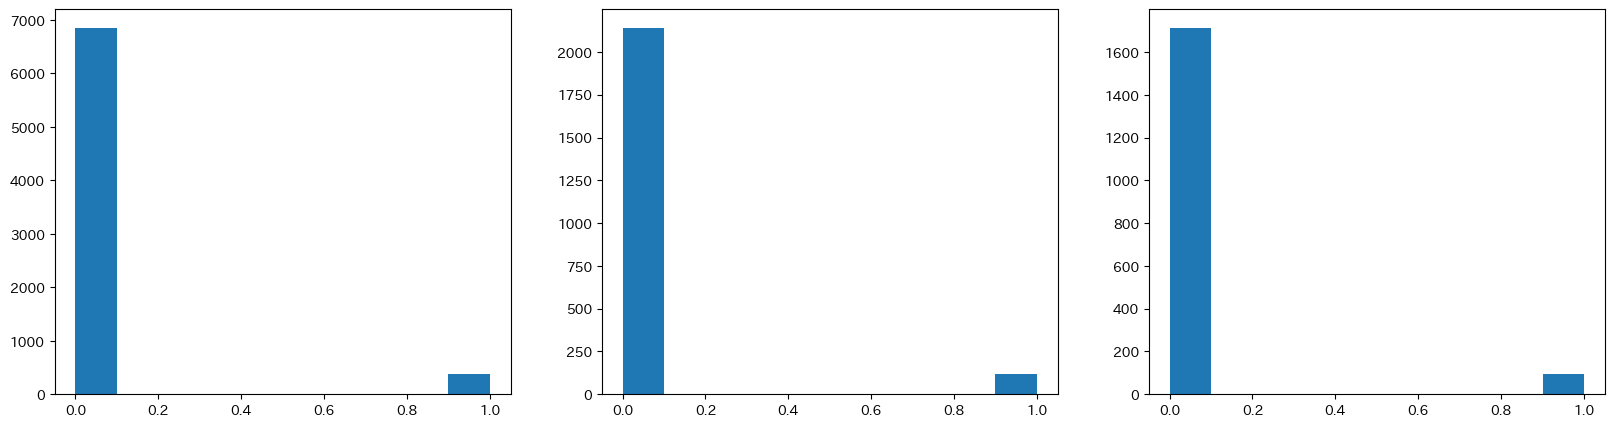

In [287]:
from sklearn.model_selection import StratifiedShuffleSplit

#もし一度でも実行しているのであればtmpに一時保存しているものを代入
if 'year' in main_data.columns:
    main_data=tmp_data.copy()
else:
    tmp_data=main_data.copy()
# main_data=main_data.drop(['2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率', '3日前のG数', '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率', '3日前のBB確率', '3日前のRB確率'],axis=1)

#対象日をイベ日だけにしたい場合
# target_day_end=9
# main_data = main_data[(main_data['day_end'] == target_day_end)]
#対象機種だけにしたい場合
main_data = main_data[(main_data['機種名'] == "マイジャグラーV")]
#特徴量作成
main_data['year'] = main_data['日付'].dt.year #年度
main_data['month'] = main_data['日付'].dt.month #月
main_data['day'] = main_data['日付'].dt.day #日
main_data['weekday'] = main_data['日付'].dt.weekday #曜日
main_data['day_end_2'] = main_data['日付'].astype(str).str[-2].astype(int) #日付2桁目
main_data['day_zoro'] = 0
main_data.loc[main_data['day_end']==main_data['day_end_2'],'day_zoro'] = 1 #ゾロ目を１とする

main_data['machine_end'] = main_data['台番号'].astype(str).str[-1].astype(int) #台番号末尾
main_data['machine_end_2'] = main_data['台番号'].astype(str).str[-2].astype(int) #台番号2桁目
main_data['machine_zoro'] = 0
main_data.loc[main_data['machine_end']==main_data['machine_end_2'],'machine_zoro'] = 1 #台番号ゾロ目を１とする

#設定0を削除してみる
# main_data = main_data[main_data['setting'] != 0]

# 高設定を1,それ以外を0とする。
main_data.loc[(main_data['setting'] < 5),'learning_setting'] = 0
main_data.loc[(main_data['setting'] >= 5),'learning_setting'] = 1
display(main_data.head(10))
X = main_data.drop(['learning_setting','日付', 'setting'],axis=1).values
y = main_data['learning_setting'].values
columns_name = main_data.drop(['setting','日付', 'learning_setting'],axis=1).columns
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 

def data_split(X,y):
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train = pd.DataFrame(X_train, columns=columns_name)
    X_test = pd.DataFrame(X_test, columns=columns_name)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_split(X, y)
X_train, y_train, X_val, y_val = data_split(X_train.values, y_train)

print("train shape", X_train.shape)
print("test shape", X_test.shape)
print("validation shape", X_val.shape)
print(X_train.columns, X_test.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(y_train)

plt.subplot(1,3,2)
plt.hist(y_test)

plt.subplot(1,3,3)
plt.hist(y_val)

[I 2023-09-26 15:18:41,379] A new study created in memory with name: no-name-b3c95c30-d889-405b-b080-c8f34f62478f


Index(['機種名', '台番号', 'day_end', '機種台数', '前日のG数', '前日の差枚', '前日のBB回数', '前日のRB回数',
       '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング',
       '前日の合成回数ランキング', '前日の合成確率ランキング', '2日前のG数', '2日前の差枚', '2日前のBB回数',
       '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率', '3日前のG数',
       '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率', '3日前のBB確率',
       '3日前のRB確率', 'G数過去2日間合計', '差枚過去2日間合計', '合成回数過去2日間合計', '合成確率過去2日間平均',
       'G数過去3日間合計', '差枚過去3日間合計', '合成回数過去3日間合計', '合成確率過去3日間平均',
       '過去2日間合計G数ランキング', '過去2日間合計差枚ランキング', '過去2日間合計合成回数ランキング',
       '過去2日間平均合成確率ランキング', '過去3日間合計G数ランキング', '過去3日間合計差枚ランキング',
       '過去3日間合計合成回数ランキング', '過去3日間平均合成確率ランキング', 'year', 'month', 'day',
       'weekday', 'day_end_2', 'day_zoro', 'machine_end', 'machine_end_2',
       'machine_zoro'],
      dtype='object')


feature_fraction, val_score: inf:   0%|                                                                                                     | 0/7 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

feature_fraction, val_score: 0.053911:  14%|############5                                                                           | 1/7 [00:03<00:21,  3.59s/it]

[933]	valid_0's binary_error: 0.0539107
[934]	valid_0's binary_error: 0.0539107
[935]	valid_0's binary_error: 0.0539107
[936]	valid_0's binary_error: 0.0539107
[937]	valid_0's binary_error: 0.0539107
[938]	valid_0's binary_error: 0.0539107
[939]	valid_0's binary_error: 0.0539107
[940]	valid_0's binary_error: 0.0539107
[941]	valid_0's binary_error: 0.0539107
[942]	valid_0's binary_error: 0.0539107
[943]	valid_0's binary_error: 0.0539107
[944]	valid_0's binary_error: 0.0539107
[945]	valid_0's binary_error: 0.0539107
[946]	valid_0's binary_error: 0.0539107
[947]	valid_0's binary_error: 0.0539107
[948]	valid_0's binary_error: 0.0539107
[949]	valid_0's binary_error: 0.0539107
[950]	valid_0's binary_error: 0.0539107
[951]	valid_0's binary_error: 0.0539107
[952]	valid_0's binary_error: 0.0539107
[953]	valid_0's binary_error: 0.0539107
[954]	valid_0's binary_error: 0.0539107
[955]	valid_0's binary_error: 0.0539107
[956]	valid_0's binary_error: 0.0539107
[957]	valid_0's binary_error: 0.0539107


feature_fraction, val_score: 0.053911:  29%|#########################1                                                              | 2/7 [00:05<00:11,  2.34s/it]

[946]	valid_0's binary_error: 0.0539107
[947]	valid_0's binary_error: 0.0539107
[948]	valid_0's binary_error: 0.0539107
[949]	valid_0's binary_error: 0.0539107
[950]	valid_0's binary_error: 0.0539107
[951]	valid_0's binary_error: 0.0539107
[952]	valid_0's binary_error: 0.0539107
[953]	valid_0's binary_error: 0.0539107
[954]	valid_0's binary_error: 0.0539107
[955]	valid_0's binary_error: 0.0539107
[956]	valid_0's binary_error: 0.0539107
[957]	valid_0's binary_error: 0.0539107
[958]	valid_0's binary_error: 0.0539107
[959]	valid_0's binary_error: 0.0539107
[960]	valid_0's binary_error: 0.0539107
[961]	valid_0's binary_error: 0.0539107
[962]	valid_0's binary_error: 0.0539107
[963]	valid_0's binary_error: 0.0539107
[964]	valid_0's binary_error: 0.0539107
[965]	valid_0's binary_error: 0.0539107
[966]	valid_0's binary_error: 0.0539107
[967]	valid_0's binary_error: 0.0539107
[968]	valid_0's binary_error: 0.0539107
[969]	valid_0's binary_error: 0.0539107
[970]	valid_0's binary_error: 0.0539107


feature_fraction, val_score: 0.053469:  43%|#####################################7                                                  | 3/7 [00:06<00:07,  1.98s/it]

[950]	valid_0's binary_error: 0.0534688
[951]	valid_0's binary_error: 0.0534688
[952]	valid_0's binary_error: 0.0534688
[953]	valid_0's binary_error: 0.0534688
[954]	valid_0's binary_error: 0.0534688
[955]	valid_0's binary_error: 0.0534688
[956]	valid_0's binary_error: 0.0534688
[957]	valid_0's binary_error: 0.0534688
[958]	valid_0's binary_error: 0.0534688
[959]	valid_0's binary_error: 0.0534688
[960]	valid_0's binary_error: 0.0534688
[961]	valid_0's binary_error: 0.0534688
[962]	valid_0's binary_error: 0.0534688
[963]	valid_0's binary_error: 0.0534688
[964]	valid_0's binary_error: 0.0534688
[965]	valid_0's binary_error: 0.0534688
[966]	valid_0's binary_error: 0.0534688
[967]	valid_0's binary_error: 0.0534688
[968]	valid_0's binary_error: 0.0534688
[969]	valid_0's binary_error: 0.0534688
[970]	valid_0's binary_error: 0.0534688
[971]	valid_0's binary_error: 0.0534688
[972]	valid_0's binary_error: 0.0534688
[973]	valid_0's binary_error: 0.0534688
[974]	valid_0's binary_error: 0.0534688


feature_fraction, val_score: 0.053469:  57%|##################################################2                                     | 4/7 [00:07<00:04,  1.67s/it]

[832]	valid_0's binary_error: 0.0534688
[833]	valid_0's binary_error: 0.0534688
[834]	valid_0's binary_error: 0.0534688
[835]	valid_0's binary_error: 0.0534688
[836]	valid_0's binary_error: 0.0534688
[837]	valid_0's binary_error: 0.0534688
[838]	valid_0's binary_error: 0.0534688
[839]	valid_0's binary_error: 0.0534688
[840]	valid_0's binary_error: 0.0534688
[841]	valid_0's binary_error: 0.0534688
[842]	valid_0's binary_error: 0.0534688
[843]	valid_0's binary_error: 0.0534688
[844]	valid_0's binary_error: 0.0534688
[845]	valid_0's binary_error: 0.0534688
[846]	valid_0's binary_error: 0.0534688
[847]	valid_0's binary_error: 0.0534688
[848]	valid_0's binary_error: 0.0534688
[849]	valid_0's binary_error: 0.0534688
[850]	valid_0's binary_error: 0.0534688
[851]	valid_0's binary_error: 0.0534688
[852]	valid_0's binary_error: 0.0534688
[853]	valid_0's binary_error: 0.0534688
[854]	valid_0's binary_error: 0.0534688
[855]	valid_0's binary_error: 0.0534688
[856]	valid_0's binary_error: 0.0534688


feature_fraction, val_score: 0.053469:  71%|##############################################################8                         | 5/7 [00:09<00:03,  1.56s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

feature_fraction, val_score: 0.053469:  86%|###########################################################################4            | 6/7 [00:10<00:01,  1.52s/it]

[889]	valid_0's binary_error: 0.0534688
[890]	valid_0's binary_error: 0.0534688
[891]	valid_0's binary_error: 0.0534688
[892]	valid_0's binary_error: 0.0534688
[893]	valid_0's binary_error: 0.0534688
[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688
[899]	valid_0's binary_error: 0.0534688
[900]	valid_0's binary_error: 0.0534688
[901]	valid_0's binary_error: 0.0534688
[902]	valid_0's binary_error: 0.0534688
[903]	valid_0's binary_error: 0.0534688
[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688
[910]	valid_0's binary_error: 0.0534688
[911]	valid_0's binary_error: 0.0534688
[912]	valid_0's binary_error: 0.0534688
[913]	valid_0's binary_error: 0.0534688


feature_fraction, val_score: 0.053469: 100%|########################################################################################| 7/7 [00:12<00:00,  1.73s/it]


[934]	valid_0's binary_error: 0.0539107
[935]	valid_0's binary_error: 0.0539107
[936]	valid_0's binary_error: 0.0539107
[937]	valid_0's binary_error: 0.0539107
[938]	valid_0's binary_error: 0.0539107
[939]	valid_0's binary_error: 0.0539107
[940]	valid_0's binary_error: 0.0539107
[941]	valid_0's binary_error: 0.0539107
[942]	valid_0's binary_error: 0.0539107
[943]	valid_0's binary_error: 0.0539107
[944]	valid_0's binary_error: 0.0539107
[945]	valid_0's binary_error: 0.0539107
[946]	valid_0's binary_error: 0.0539107
[947]	valid_0's binary_error: 0.0539107
[948]	valid_0's binary_error: 0.0539107
[949]	valid_0's binary_error: 0.0539107
[950]	valid_0's binary_error: 0.0539107
[951]	valid_0's binary_error: 0.0539107
[952]	valid_0's binary_error: 0.0539107
[953]	valid_0's binary_error: 0.0539107
[954]	valid_0's binary_error: 0.0539107
[955]	valid_0's binary_error: 0.0539107
[956]	valid_0's binary_error: 0.0539107
[957]	valid_0's binary_error: 0.0539107
[958]	valid_0's binary_error: 0.0539107


num_leaves, val_score: 0.053469:   0%|                                                                                                     | 0/20 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0539107
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:   5%|####6                                                                                        | 1/20 [00:01<00:30,  1.61s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  10%|#########3                                                                                   | 2/20 [00:03<00:28,  1.60s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  15%|#############9                                                                               | 3/20 [00:05<00:31,  1.86s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  20%|##################6                                                                          | 4/20 [00:06<00:22,  1.41s/it]

[982]	valid_0's binary_error: 0.0543526
[983]	valid_0's binary_error: 0.0543526
[984]	valid_0's binary_error: 0.0543526
[985]	valid_0's binary_error: 0.0543526
[986]	valid_0's binary_error: 0.0543526
[987]	valid_0's binary_error: 0.0543526
[988]	valid_0's binary_error: 0.0543526
[989]	valid_0's binary_error: 0.0543526
[990]	valid_0's binary_error: 0.0543526
[991]	valid_0's binary_error: 0.0543526
[992]	valid_0's binary_error: 0.0543526
[993]	valid_0's binary_error: 0.0543526
[994]	valid_0's binary_error: 0.0543526
[995]	valid_0's binary_error: 0.0543526
[996]	valid_0's binary_error: 0.0543526
[997]	valid_0's binary_error: 0.0543526
[998]	valid_0's binary_error: 0.0543526
[999]	valid_0's binary_error: 0.0543526
[1000]	valid_0's binary_error: 0.0543526
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0

num_leaves, val_score: 0.053469:  25%|#######################2                                                                     | 5/20 [00:08<00:24,  1.63s/it]

[969]	valid_0's binary_error: 0.0534688
[970]	valid_0's binary_error: 0.0534688
[971]	valid_0's binary_error: 0.0534688
[972]	valid_0's binary_error: 0.0534688
[973]	valid_0's binary_error: 0.0534688
[974]	valid_0's binary_error: 0.0534688
[975]	valid_0's binary_error: 0.0534688
[976]	valid_0's binary_error: 0.0534688
[977]	valid_0's binary_error: 0.0534688
[978]	valid_0's binary_error: 0.0534688
[979]	valid_0's binary_error: 0.0534688
[980]	valid_0's binary_error: 0.0534688
[981]	valid_0's binary_error: 0.0534688
[982]	valid_0's binary_error: 0.0534688
[983]	valid_0's binary_error: 0.0534688
[984]	valid_0's binary_error: 0.0534688
[985]	valid_0's binary_error: 0.0534688
[986]	valid_0's binary_error: 0.0534688
[987]	valid_0's binary_error: 0.0534688
[988]	valid_0's binary_error: 0.0534688
[989]	valid_0's binary_error: 0.0534688
[990]	valid_0's binary_error: 0.0534688
[991]	valid_0's binary_error: 0.0534688
[992]	valid_0's binary_error: 0.0534688
[993]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  30%|###########################9                                                                 | 6/20 [00:08<00:17,  1.23s/it]

[544]	valid_0's binary_error: 0.0534688
[545]	valid_0's binary_error: 0.0534688
[546]	valid_0's binary_error: 0.0539107
[547]	valid_0's binary_error: 0.0539107
[548]	valid_0's binary_error: 0.0534688
[549]	valid_0's binary_error: 0.0534688
[550]	valid_0's binary_error: 0.0534688
[551]	valid_0's binary_error: 0.0534688
[552]	valid_0's binary_error: 0.0534688
[553]	valid_0's binary_error: 0.0534688
[554]	valid_0's binary_error: 0.0534688
[555]	valid_0's binary_error: 0.0534688
[556]	valid_0's binary_error: 0.0534688
[557]	valid_0's binary_error: 0.0534688
[558]	valid_0's binary_error: 0.0534688
[559]	valid_0's binary_error: 0.0534688
[560]	valid_0's binary_error: 0.0539107
[561]	valid_0's binary_error: 0.0534688
[562]	valid_0's binary_error: 0.0534688
[563]	valid_0's binary_error: 0.0534688
[564]	valid_0's binary_error: 0.0539107
[565]	valid_0's binary_error: 0.0539107
[566]	valid_0's binary_error: 0.0539107
[567]	valid_0's binary_error: 0.0539107
[568]	valid_0's binary_error: 0.0539107


num_leaves, val_score: 0.053469:  35%|################################5                                                            | 7/20 [00:10<00:18,  1.41s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  40%|#####################################2                                                       | 8/20 [00:12<00:17,  1.49s/it]

[917]	valid_0's binary_error: 0.0534688
[918]	valid_0's binary_error: 0.0534688
[919]	valid_0's binary_error: 0.0534688
[920]	valid_0's binary_error: 0.0534688
[921]	valid_0's binary_error: 0.0534688
[922]	valid_0's binary_error: 0.0534688
[923]	valid_0's binary_error: 0.0534688
[924]	valid_0's binary_error: 0.0534688
[925]	valid_0's binary_error: 0.0534688
[926]	valid_0's binary_error: 0.0534688
[927]	valid_0's binary_error: 0.0534688
[928]	valid_0's binary_error: 0.0534688
[929]	valid_0's binary_error: 0.0534688
[930]	valid_0's binary_error: 0.0534688
[931]	valid_0's binary_error: 0.0534688
[932]	valid_0's binary_error: 0.0534688
[933]	valid_0's binary_error: 0.0534688
[934]	valid_0's binary_error: 0.0534688
[935]	valid_0's binary_error: 0.0534688
[936]	valid_0's binary_error: 0.0534688
[937]	valid_0's binary_error: 0.0534688
[938]	valid_0's binary_error: 0.0534688
[939]	valid_0's binary_error: 0.0534688
[940]	valid_0's binary_error: 0.0534688
[941]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  45%|#########################################8                                                   | 9/20 [00:13<00:16,  1.49s/it]

[784]	valid_0's binary_error: 0.0534688
[785]	valid_0's binary_error: 0.0534688
[786]	valid_0's binary_error: 0.0534688
[787]	valid_0's binary_error: 0.0534688
[788]	valid_0's binary_error: 0.0534688
[789]	valid_0's binary_error: 0.0534688
[790]	valid_0's binary_error: 0.0534688
[791]	valid_0's binary_error: 0.0534688
[792]	valid_0's binary_error: 0.0534688
[793]	valid_0's binary_error: 0.0534688
[794]	valid_0's binary_error: 0.0534688
[795]	valid_0's binary_error: 0.0534688
[796]	valid_0's binary_error: 0.0534688
[797]	valid_0's binary_error: 0.0534688
[798]	valid_0's binary_error: 0.0534688
[799]	valid_0's binary_error: 0.0534688
[800]	valid_0's binary_error: 0.0534688
[801]	valid_0's binary_error: 0.0534688
[802]	valid_0's binary_error: 0.0534688
[803]	valid_0's binary_error: 0.0534688
[804]	valid_0's binary_error: 0.0534688
[805]	valid_0's binary_error: 0.0534688
[806]	valid_0's binary_error: 0.0534688
[807]	valid_0's binary_error: 0.0534688
[808]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  50%|##############################################                                              | 10/20 [00:15<00:14,  1.49s/it]

[834]	valid_0's binary_error: 0.0534688
[835]	valid_0's binary_error: 0.0534688
[836]	valid_0's binary_error: 0.0534688
[837]	valid_0's binary_error: 0.0534688
[838]	valid_0's binary_error: 0.0534688
[839]	valid_0's binary_error: 0.0534688
[840]	valid_0's binary_error: 0.0534688
[841]	valid_0's binary_error: 0.0534688
[842]	valid_0's binary_error: 0.0534688
[843]	valid_0's binary_error: 0.0534688
[844]	valid_0's binary_error: 0.0534688
[845]	valid_0's binary_error: 0.0534688
[846]	valid_0's binary_error: 0.0534688
[847]	valid_0's binary_error: 0.0534688
[848]	valid_0's binary_error: 0.0534688
[849]	valid_0's binary_error: 0.0534688
[850]	valid_0's binary_error: 0.0534688
[851]	valid_0's binary_error: 0.0534688
[852]	valid_0's binary_error: 0.0534688
[853]	valid_0's binary_error: 0.0534688
[854]	valid_0's binary_error: 0.0534688
[855]	valid_0's binary_error: 0.0534688
[856]	valid_0's binary_error: 0.0534688
[857]	valid_0's binary_error: 0.0534688
[858]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  50%|##############################################                                              | 10/20 [00:16<00:14,  1.49s/it]

[757]	valid_0's binary_error: 0.0534688
[758]	valid_0's binary_error: 0.0534688
[759]	valid_0's binary_error: 0.0534688
[760]	valid_0's binary_error: 0.0534688
[761]	valid_0's binary_error: 0.0534688
[762]	valid_0's binary_error: 0.0534688
[763]	valid_0's binary_error: 0.0534688
[764]	valid_0's binary_error: 0.0534688
[765]	valid_0's binary_error: 0.0534688
[766]	valid_0's binary_error: 0.0534688
[767]	valid_0's binary_error: 0.0534688
[768]	valid_0's binary_error: 0.0534688
[769]	valid_0's binary_error: 0.0534688
[770]	valid_0's binary_error: 0.0534688
[771]	valid_0's binary_error: 0.0534688
[772]	valid_0's binary_error: 0.0534688
[773]	valid_0's binary_error: 0.0534688
[774]	valid_0's binary_error: 0.0534688
[775]	valid_0's binary_error: 0.0534688
[776]	valid_0's binary_error: 0.0534688
[777]	valid_0's binary_error: 0.0534688
[778]	valid_0's binary_error: 0.0534688
[779]	valid_0's binary_error: 0.0534688
[780]	valid_0's binary_error: 0.0534688
[781]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  55%|##################################################6                                         | 11/20 [00:16<00:13,  1.44s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  60%|#######################################################2                                    | 12/20 [00:17<00:11,  1.45s/it]

[801]	valid_0's binary_error: 0.0534688
[802]	valid_0's binary_error: 0.0534688
[803]	valid_0's binary_error: 0.0534688
[804]	valid_0's binary_error: 0.0534688
[805]	valid_0's binary_error: 0.0534688
[806]	valid_0's binary_error: 0.0534688
[807]	valid_0's binary_error: 0.0534688
[808]	valid_0's binary_error: 0.0534688
[809]	valid_0's binary_error: 0.0534688
[810]	valid_0's binary_error: 0.0534688
[811]	valid_0's binary_error: 0.0534688
[812]	valid_0's binary_error: 0.0534688
[813]	valid_0's binary_error: 0.0534688
[814]	valid_0's binary_error: 0.0534688
[815]	valid_0's binary_error: 0.0534688
[816]	valid_0's binary_error: 0.0534688
[817]	valid_0's binary_error: 0.0534688
[818]	valid_0's binary_error: 0.0534688
[819]	valid_0's binary_error: 0.0534688
[820]	valid_0's binary_error: 0.0534688
[821]	valid_0's binary_error: 0.0534688
[822]	valid_0's binary_error: 0.0534688
[823]	valid_0's binary_error: 0.0534688
[824]	valid_0's binary_error: 0.0534688
[825]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  65%|###########################################################8                                | 13/20 [00:19<00:10,  1.54s/it]

[814]	valid_0's binary_error: 0.0534688
[815]	valid_0's binary_error: 0.0534688
[816]	valid_0's binary_error: 0.0534688
[817]	valid_0's binary_error: 0.0534688
[818]	valid_0's binary_error: 0.0534688
[819]	valid_0's binary_error: 0.0534688
[820]	valid_0's binary_error: 0.0534688
[821]	valid_0's binary_error: 0.0534688
[822]	valid_0's binary_error: 0.0534688
[823]	valid_0's binary_error: 0.0534688
[824]	valid_0's binary_error: 0.0534688
[825]	valid_0's binary_error: 0.0534688
[826]	valid_0's binary_error: 0.0534688
[827]	valid_0's binary_error: 0.0534688
[828]	valid_0's binary_error: 0.0534688
[829]	valid_0's binary_error: 0.0534688
[830]	valid_0's binary_error: 0.0534688
[831]	valid_0's binary_error: 0.0534688
[832]	valid_0's binary_error: 0.0534688
[833]	valid_0's binary_error: 0.0534688
[834]	valid_0's binary_error: 0.0534688
[835]	valid_0's binary_error: 0.0534688
[836]	valid_0's binary_error: 0.0534688
[837]	valid_0's binary_error: 0.0534688
[838]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  70%|################################################################3                           | 14/20 [00:21<00:09,  1.65s/it]

[933]	valid_0's binary_error: 0.0534688
[934]	valid_0's binary_error: 0.0534688
[935]	valid_0's binary_error: 0.0534688
[936]	valid_0's binary_error: 0.0534688
[937]	valid_0's binary_error: 0.0534688
[938]	valid_0's binary_error: 0.0534688
[939]	valid_0's binary_error: 0.0534688
[940]	valid_0's binary_error: 0.0534688
[941]	valid_0's binary_error: 0.0534688
[942]	valid_0's binary_error: 0.0534688
[943]	valid_0's binary_error: 0.0534688
[944]	valid_0's binary_error: 0.0534688
[945]	valid_0's binary_error: 0.0534688
[946]	valid_0's binary_error: 0.0534688
[947]	valid_0's binary_error: 0.0534688
[948]	valid_0's binary_error: 0.0534688
[949]	valid_0's binary_error: 0.0534688
[950]	valid_0's binary_error: 0.0534688
[951]	valid_0's binary_error: 0.0534688
[952]	valid_0's binary_error: 0.0534688
[953]	valid_0's binary_error: 0.0534688
[954]	valid_0's binary_error: 0.0534688
[955]	valid_0's binary_error: 0.0534688
[956]	valid_0's binary_error: 0.0534688
[957]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  75%|#####################################################################                       | 15/20 [00:22<00:08,  1.61s/it]

[864]	valid_0's binary_error: 0.0534688
[865]	valid_0's binary_error: 0.0534688
[866]	valid_0's binary_error: 0.0534688
[867]	valid_0's binary_error: 0.0534688
[868]	valid_0's binary_error: 0.0534688
[869]	valid_0's binary_error: 0.0534688
[870]	valid_0's binary_error: 0.0534688
[871]	valid_0's binary_error: 0.0534688
[872]	valid_0's binary_error: 0.0534688
[873]	valid_0's binary_error: 0.0534688
[874]	valid_0's binary_error: 0.0534688
[875]	valid_0's binary_error: 0.0534688
[876]	valid_0's binary_error: 0.0534688
[877]	valid_0's binary_error: 0.0534688
[878]	valid_0's binary_error: 0.0534688
[879]	valid_0's binary_error: 0.0534688
[880]	valid_0's binary_error: 0.0534688
[881]	valid_0's binary_error: 0.0534688
[882]	valid_0's binary_error: 0.0534688
[883]	valid_0's binary_error: 0.0534688
[884]	valid_0's binary_error: 0.0534688
[885]	valid_0's binary_error: 0.0534688
[886]	valid_0's binary_error: 0.0534688
[887]	valid_0's binary_error: 0.0534688
[888]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  80%|#########################################################################6                  | 16/20 [00:24<00:06,  1.70s/it]

[829]	valid_0's binary_error: 0.0534688
[830]	valid_0's binary_error: 0.0534688
[831]	valid_0's binary_error: 0.0534688
[832]	valid_0's binary_error: 0.0534688
[833]	valid_0's binary_error: 0.0534688
[834]	valid_0's binary_error: 0.0534688
[835]	valid_0's binary_error: 0.0534688
[836]	valid_0's binary_error: 0.0534688
[837]	valid_0's binary_error: 0.0534688
[838]	valid_0's binary_error: 0.0534688
[839]	valid_0's binary_error: 0.0534688
[840]	valid_0's binary_error: 0.0534688
[841]	valid_0's binary_error: 0.0534688
[842]	valid_0's binary_error: 0.0534688
[843]	valid_0's binary_error: 0.0534688
[844]	valid_0's binary_error: 0.0534688
[845]	valid_0's binary_error: 0.0534688
[846]	valid_0's binary_error: 0.0534688
[847]	valid_0's binary_error: 0.0534688
[848]	valid_0's binary_error: 0.0534688
[849]	valid_0's binary_error: 0.0534688
[850]	valid_0's binary_error: 0.0534688
[851]	valid_0's binary_error: 0.0534688
[852]	valid_0's binary_error: 0.0534688
[853]	valid_0's binary_error: 0.0534688


num_leaves, val_score: 0.053469:  85%|##############################################################################2             | 17/20 [00:26<00:04,  1.66s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  90%|##################################################################################8         | 18/20 [00:28<00:03,  1.70s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

num_leaves, val_score: 0.053469:  95%|#######################################################################################3    | 19/20 [00:30<00:01,  1.81s/it]

[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688
[899]	valid_0's binary_error: 0.0534688
[900]	valid_0's binary_error: 0.0534688
[901]	valid_0's binary_error: 0.0534688
[902]	valid_0's binary_error: 0.0534688
[903]	valid_0's binary_error: 0.0534688
[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688
[910]	valid_0's binary_error: 0.0534688
[911]	valid_0's binary_error: 0.0534688
[912]	valid_0's binary_error: 0.0534688
[913]	valid_0's binary_error: 0.0534688
[914]	valid_0's binary_error: 0.0534688
[915]	valid_0's binary_error: 0.0534688
[916]	valid_0's binary_error: 0.0534688
[917]	valid_0's binary_error: 0.0534688
[918]	valid_0's binary_error: 0.0534688


bagging, val_score: 0.053469:   0%|                                                                                                        | 0/10 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

bagging, val_score: 0.053469:  10%|#########6                                                                                      | 1/10 [00:01<00:13,  1.46s/it]

[885]	valid_0's binary_error: 0.0534688
[886]	valid_0's binary_error: 0.0534688
[887]	valid_0's binary_error: 0.0534688
[888]	valid_0's binary_error: 0.0534688
[889]	valid_0's binary_error: 0.0534688
[890]	valid_0's binary_error: 0.0534688
[891]	valid_0's binary_error: 0.0534688
[892]	valid_0's binary_error: 0.0534688
[893]	valid_0's binary_error: 0.0534688
[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688
[899]	valid_0's binary_error: 0.0534688
[900]	valid_0's binary_error: 0.0534688
[901]	valid_0's binary_error: 0.0534688
[902]	valid_0's binary_error: 0.0534688
[903]	valid_0's binary_error: 0.0534688
[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688


bagging, val_score: 0.053469:  20%|###################2                                                                            | 2/10 [00:02<00:11,  1.39s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

bagging, val_score: 0.053469:  20%|###################2                                                                            | 2/10 [00:04<00:11,  1.39s/it]

[817]	valid_0's binary_error: 0.0534688
[818]	valid_0's binary_error: 0.0534688
[819]	valid_0's binary_error: 0.0534688
[820]	valid_0's binary_error: 0.0534688
[821]	valid_0's binary_error: 0.0534688
[822]	valid_0's binary_error: 0.0534688
[823]	valid_0's binary_error: 0.0534688
[824]	valid_0's binary_error: 0.0534688
[825]	valid_0's binary_error: 0.0534688
[826]	valid_0's binary_error: 0.0534688
[827]	valid_0's binary_error: 0.0534688
[828]	valid_0's binary_error: 0.0534688
[829]	valid_0's binary_error: 0.0534688
[830]	valid_0's binary_error: 0.0534688
[831]	valid_0's binary_error: 0.0534688
[832]	valid_0's binary_error: 0.0534688
[833]	valid_0's binary_error: 0.0534688
[834]	valid_0's binary_error: 0.0534688
[835]	valid_0's binary_error: 0.0534688
[836]	valid_0's binary_error: 0.0534688
[837]	valid_0's binary_error: 0.0534688
[838]	valid_0's binary_error: 0.0534688
[839]	valid_0's binary_error: 0.0534688
[840]	valid_0's binary_error: 0.0534688
[841]	valid_0's binary_error: 0.0534688


bagging, val_score: 0.053469:  30%|############################8                                                                   | 3/10 [00:04<00:09,  1.35s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0539107
[20]	valid_0's binary_error: 0.0539107
[21]	valid_0's binary_error: 0.0539107
[22]	valid_0's binary_error: 0.0543526
[23]	valid_0's binary_error: 0.0543526
[24]	valid_0's binary_error: 0.0543526
[25]	valid_0's binary_error: 0.0543526
[26]	valid_0's binary_error: 0.054

bagging, val_score: 0.053469:  40%|######################################4                                                         | 4/10 [00:05<00:07,  1.33s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.053027
[11]	valid_0's binary_error: 0.053027
[12]	valid_0's binary_error: 0.053027
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.053027
[15]	valid_0's binary_error: 0.053027
[16]	valid_0's binary_error: 0.053027
[17]	valid_0's binary_error: 0.053027
[18]	valid_0's binary_error: 0.053027
[19]	valid_0's binary_error: 0.053027
[20]	valid_0's binary_error: 0.053027
[21]	valid_0's binary_error: 0.053027
[22]	valid_0's binary_error: 0.053027
[23]	valid_0's binary_error: 0.053027
[24]	valid_0's binary_error: 0.053027
[25]	valid_0's binary_error: 0.053027
[26]	valid_0's binary_error: 0.053027
[27]	valid_

bagging, val_score: 0.053469:  50%|################################################                                                | 5/10 [00:06<00:06,  1.39s/it]

[856]	valid_0's binary_error: 0.0534688
[857]	valid_0's binary_error: 0.0534688
[858]	valid_0's binary_error: 0.0534688
[859]	valid_0's binary_error: 0.0534688
[860]	valid_0's binary_error: 0.0534688
[861]	valid_0's binary_error: 0.0534688
[862]	valid_0's binary_error: 0.0534688
[863]	valid_0's binary_error: 0.0534688
[864]	valid_0's binary_error: 0.0534688
[865]	valid_0's binary_error: 0.0534688
[866]	valid_0's binary_error: 0.0534688
[867]	valid_0's binary_error: 0.0534688
[868]	valid_0's binary_error: 0.0534688
[869]	valid_0's binary_error: 0.0534688
[870]	valid_0's binary_error: 0.0534688
[871]	valid_0's binary_error: 0.0534688
[872]	valid_0's binary_error: 0.0534688
[873]	valid_0's binary_error: 0.0534688
[874]	valid_0's binary_error: 0.0534688
[875]	valid_0's binary_error: 0.0534688
[876]	valid_0's binary_error: 0.0534688
[877]	valid_0's binary_error: 0.0534688
[878]	valid_0's binary_error: 0.0534688
[879]	valid_0's binary_error: 0.0534688
[880]	valid_0's binary_error: 0.0534688


bagging, val_score: 0.053469:  60%|#########################################################6                                      | 6/10 [00:08<00:05,  1.44s/it]

[850]	valid_0's binary_error: 0.0543526
[851]	valid_0's binary_error: 0.0543526
[852]	valid_0's binary_error: 0.0543526
[853]	valid_0's binary_error: 0.0543526
[854]	valid_0's binary_error: 0.0543526
[855]	valid_0's binary_error: 0.0543526
[856]	valid_0's binary_error: 0.0543526
[857]	valid_0's binary_error: 0.0543526
[858]	valid_0's binary_error: 0.0543526
[859]	valid_0's binary_error: 0.0543526
[860]	valid_0's binary_error: 0.0543526
[861]	valid_0's binary_error: 0.0543526
[862]	valid_0's binary_error: 0.0543526
[863]	valid_0's binary_error: 0.0543526
[864]	valid_0's binary_error: 0.0543526
[865]	valid_0's binary_error: 0.0543526
[866]	valid_0's binary_error: 0.0543526
[867]	valid_0's binary_error: 0.0543526
[868]	valid_0's binary_error: 0.0543526
[869]	valid_0's binary_error: 0.0543526
[870]	valid_0's binary_error: 0.0543526
[871]	valid_0's binary_error: 0.0543526
[872]	valid_0's binary_error: 0.0543526
[873]	valid_0's binary_error: 0.0543526
[874]	valid_0's binary_error: 0.0543526


bagging, val_score: 0.053469:  70%|###################################################################1                            | 7/10 [00:09<00:04,  1.44s/it]

[909]	valid_0's binary_error: 0.0539107
[910]	valid_0's binary_error: 0.0539107
[911]	valid_0's binary_error: 0.0539107
[912]	valid_0's binary_error: 0.0539107
[913]	valid_0's binary_error: 0.0539107
[914]	valid_0's binary_error: 0.0539107
[915]	valid_0's binary_error: 0.0539107
[916]	valid_0's binary_error: 0.0539107
[917]	valid_0's binary_error: 0.0539107
[918]	valid_0's binary_error: 0.0539107
[919]	valid_0's binary_error: 0.0539107
[920]	valid_0's binary_error: 0.0539107
[921]	valid_0's binary_error: 0.0539107
[922]	valid_0's binary_error: 0.0539107
[923]	valid_0's binary_error: 0.0539107
[924]	valid_0's binary_error: 0.0539107
[925]	valid_0's binary_error: 0.0539107
[926]	valid_0's binary_error: 0.0539107
[927]	valid_0's binary_error: 0.0539107
[928]	valid_0's binary_error: 0.0539107
[929]	valid_0's binary_error: 0.0539107
[930]	valid_0's binary_error: 0.0539107
[931]	valid_0's binary_error: 0.0539107
[932]	valid_0's binary_error: 0.0539107
[933]	valid_0's binary_error: 0.0539107


bagging, val_score: 0.053469:  80%|############################################################################8                   | 8/10 [00:11<00:02,  1.46s/it]

[941]	valid_0's binary_error: 0.0539107
[942]	valid_0's binary_error: 0.0539107
[943]	valid_0's binary_error: 0.0539107
[944]	valid_0's binary_error: 0.0539107
[945]	valid_0's binary_error: 0.0539107
[946]	valid_0's binary_error: 0.0539107
[947]	valid_0's binary_error: 0.0539107
[948]	valid_0's binary_error: 0.0539107
[949]	valid_0's binary_error: 0.0539107
[950]	valid_0's binary_error: 0.0539107
[951]	valid_0's binary_error: 0.0539107
[952]	valid_0's binary_error: 0.0539107
[953]	valid_0's binary_error: 0.0539107
[954]	valid_0's binary_error: 0.0539107
[955]	valid_0's binary_error: 0.0539107
[956]	valid_0's binary_error: 0.0539107
[957]	valid_0's binary_error: 0.0539107
[958]	valid_0's binary_error: 0.0539107
[959]	valid_0's binary_error: 0.0539107
[960]	valid_0's binary_error: 0.0534688
[961]	valid_0's binary_error: 0.0534688
[962]	valid_0's binary_error: 0.0534688
[963]	valid_0's binary_error: 0.0534688
[964]	valid_0's binary_error: 0.0539107
[965]	valid_0's binary_error: 0.0534688


bagging, val_score: 0.053469:  90%|######################################################################################4         | 9/10 [00:13<00:01,  1.65s/it]

[963]	valid_0's binary_error: 0.0539107
[964]	valid_0's binary_error: 0.0539107
[965]	valid_0's binary_error: 0.0539107
[966]	valid_0's binary_error: 0.0539107
[967]	valid_0's binary_error: 0.0539107
[968]	valid_0's binary_error: 0.0539107
[969]	valid_0's binary_error: 0.0539107
[970]	valid_0's binary_error: 0.0539107
[971]	valid_0's binary_error: 0.0539107
[972]	valid_0's binary_error: 0.0539107
[973]	valid_0's binary_error: 0.0539107
[974]	valid_0's binary_error: 0.0539107
[975]	valid_0's binary_error: 0.0539107
[976]	valid_0's binary_error: 0.0539107
[977]	valid_0's binary_error: 0.0539107
[978]	valid_0's binary_error: 0.0539107
[979]	valid_0's binary_error: 0.0539107
[980]	valid_0's binary_error: 0.0539107
[981]	valid_0's binary_error: 0.0539107
[982]	valid_0's binary_error: 0.0539107
[983]	valid_0's binary_error: 0.0539107
[984]	valid_0's binary_error: 0.0539107
[985]	valid_0's binary_error: 0.0539107
[986]	valid_0's binary_error: 0.0539107
[987]	valid_0's binary_error: 0.0539107


bagging, val_score: 0.053469: 100%|###############################################################################################| 10/10 [00:15<00:00,  1.52s/it]


[869]	valid_0's binary_error: 0.0539107
[870]	valid_0's binary_error: 0.0539107
[871]	valid_0's binary_error: 0.0539107
[872]	valid_0's binary_error: 0.0539107
[873]	valid_0's binary_error: 0.0539107
[874]	valid_0's binary_error: 0.0539107
[875]	valid_0's binary_error: 0.0539107
[876]	valid_0's binary_error: 0.0539107
[877]	valid_0's binary_error: 0.0539107
[878]	valid_0's binary_error: 0.0539107
[879]	valid_0's binary_error: 0.0539107
[880]	valid_0's binary_error: 0.0539107
[881]	valid_0's binary_error: 0.0539107
[882]	valid_0's binary_error: 0.0539107
[883]	valid_0's binary_error: 0.0539107
[884]	valid_0's binary_error: 0.0539107
[885]	valid_0's binary_error: 0.0539107
[886]	valid_0's binary_error: 0.0539107
[887]	valid_0's binary_error: 0.0539107
[888]	valid_0's binary_error: 0.0539107
[889]	valid_0's binary_error: 0.0539107
[890]	valid_0's binary_error: 0.0539107
[891]	valid_0's binary_error: 0.0539107
[892]	valid_0's binary_error: 0.0539107
[893]	valid_0's binary_error: 0.0539107


feature_fraction_stage2, val_score: 0.053469:   0%|                                                                                         | 0/6 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

feature_fraction_stage2, val_score: 0.053469:  17%|#############5                                                                   | 1/6 [00:02<00:11,  2.24s/it]

[980]	valid_0's binary_error: 0.0543526
[981]	valid_0's binary_error: 0.0543526
[982]	valid_0's binary_error: 0.0543526
[983]	valid_0's binary_error: 0.0543526
[984]	valid_0's binary_error: 0.0543526
[985]	valid_0's binary_error: 0.0543526
[986]	valid_0's binary_error: 0.0543526
[987]	valid_0's binary_error: 0.0543526
[988]	valid_0's binary_error: 0.0543526
[989]	valid_0's binary_error: 0.0543526
[990]	valid_0's binary_error: 0.0543526
[991]	valid_0's binary_error: 0.0543526
[992]	valid_0's binary_error: 0.0543526
[993]	valid_0's binary_error: 0.0543526
[994]	valid_0's binary_error: 0.0543526
[995]	valid_0's binary_error: 0.0543526
[996]	valid_0's binary_error: 0.0543526
[997]	valid_0's binary_error: 0.0543526
[998]	valid_0's binary_error: 0.0543526
[999]	valid_0's binary_error: 0.0543526
[1000]	valid_0's binary_error: 0.0543526
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	val

feature_fraction_stage2, val_score: 0.053469:  33%|###########################                                                      | 2/6 [00:03<00:07,  1.87s/it]

[883]	valid_0's binary_error: 0.0539107
[884]	valid_0's binary_error: 0.0539107
[885]	valid_0's binary_error: 0.0539107
[886]	valid_0's binary_error: 0.0539107
[887]	valid_0's binary_error: 0.0539107
[888]	valid_0's binary_error: 0.0539107
[889]	valid_0's binary_error: 0.0539107
[890]	valid_0's binary_error: 0.0539107
[891]	valid_0's binary_error: 0.0539107
[892]	valid_0's binary_error: 0.0539107
[893]	valid_0's binary_error: 0.0539107
[894]	valid_0's binary_error: 0.0539107
[895]	valid_0's binary_error: 0.0539107
[896]	valid_0's binary_error: 0.0539107
[897]	valid_0's binary_error: 0.0539107
[898]	valid_0's binary_error: 0.0539107
[899]	valid_0's binary_error: 0.0539107
[900]	valid_0's binary_error: 0.0539107
[901]	valid_0's binary_error: 0.0539107
[902]	valid_0's binary_error: 0.0539107
[903]	valid_0's binary_error: 0.0539107
[904]	valid_0's binary_error: 0.0539107
[905]	valid_0's binary_error: 0.0539107
[906]	valid_0's binary_error: 0.0539107
[907]	valid_0's binary_error: 0.0539107


feature_fraction_stage2, val_score: 0.053469:  50%|########################################5                                        | 3/6 [00:06<00:06,  2.02s/it]

[1000]	valid_0's binary_error: 0.0534688
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0

feature_fraction_stage2, val_score: 0.053469:  67%|######################################################                           | 4/6 [00:07<00:03,  1.76s/it]

[862]	valid_0's binary_error: 0.0534688
[863]	valid_0's binary_error: 0.0534688
[864]	valid_0's binary_error: 0.0534688
[865]	valid_0's binary_error: 0.0534688
[866]	valid_0's binary_error: 0.0534688
[867]	valid_0's binary_error: 0.0534688
[868]	valid_0's binary_error: 0.0534688
[869]	valid_0's binary_error: 0.0534688
[870]	valid_0's binary_error: 0.0534688
[871]	valid_0's binary_error: 0.0534688
[872]	valid_0's binary_error: 0.0534688
[873]	valid_0's binary_error: 0.0534688
[874]	valid_0's binary_error: 0.0534688
[875]	valid_0's binary_error: 0.0534688
[876]	valid_0's binary_error: 0.0539107
[877]	valid_0's binary_error: 0.0539107
[878]	valid_0's binary_error: 0.0539107
[879]	valid_0's binary_error: 0.0539107
[880]	valid_0's binary_error: 0.0539107
[881]	valid_0's binary_error: 0.0539107
[882]	valid_0's binary_error: 0.0539107
[883]	valid_0's binary_error: 0.0539107
[884]	valid_0's binary_error: 0.0534688
[885]	valid_0's binary_error: 0.0534688
[886]	valid_0's binary_error: 0.0534688


feature_fraction_stage2, val_score: 0.053469:  83%|###################################################################5             | 5/6 [00:09<00:01,  1.71s/it]

[980]	valid_0's binary_error: 0.0534688
[981]	valid_0's binary_error: 0.0534688
[982]	valid_0's binary_error: 0.0534688
[983]	valid_0's binary_error: 0.0534688
[984]	valid_0's binary_error: 0.0534688
[985]	valid_0's binary_error: 0.0534688
[986]	valid_0's binary_error: 0.0534688
[987]	valid_0's binary_error: 0.0534688
[988]	valid_0's binary_error: 0.0534688
[989]	valid_0's binary_error: 0.0534688
[990]	valid_0's binary_error: 0.0534688
[991]	valid_0's binary_error: 0.0534688
[992]	valid_0's binary_error: 0.0534688
[993]	valid_0's binary_error: 0.0534688
[994]	valid_0's binary_error: 0.0534688
[995]	valid_0's binary_error: 0.0534688
[996]	valid_0's binary_error: 0.0534688
[997]	valid_0's binary_error: 0.0534688
[998]	valid_0's binary_error: 0.0534688
[999]	valid_0's binary_error: 0.0534688
[1000]	valid_0's binary_error: 0.0534688
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	val

feature_fraction_stage2, val_score: 0.053469: 100%|#################################################################################| 6/6 [00:10<00:00,  1.76s/it]


[887]	valid_0's binary_error: 0.0534688
[888]	valid_0's binary_error: 0.0534688
[889]	valid_0's binary_error: 0.0534688
[890]	valid_0's binary_error: 0.0534688
[891]	valid_0's binary_error: 0.0534688
[892]	valid_0's binary_error: 0.0534688
[893]	valid_0's binary_error: 0.0534688
[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688
[899]	valid_0's binary_error: 0.0534688
[900]	valid_0's binary_error: 0.0534688
[901]	valid_0's binary_error: 0.0534688
[902]	valid_0's binary_error: 0.0534688
[903]	valid_0's binary_error: 0.0534688
[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688
[910]	valid_0's binary_error: 0.0534688
[911]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:   0%|                                                                                         | 0/20 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.053027
[16]	valid_0's binary_error: 0.053027
[17]	valid_0's binary_error: 0.053027
[18]	valid_0's binary_error: 0.053027
[19]	valid_0's binary_error: 0.053027
[20]	valid_0's binary_error: 0.053027
[21]	valid_0's binary_error: 0.053027
[22]	valid_0's binary_error: 0.053027
[23]	valid_0's binary_error: 0.053027
[24]	valid_0's binary_error: 0.053027
[25]	valid_0's binary_error: 0.053027
[26]	valid_0's binary_error: 0.053027
[27]	va

regularization_factors, val_score: 0.053469:   5%|####                                                                             | 1/20 [00:02<00:40,  2.13s/it]

[892]	valid_0's binary_error: 0.0534688
[893]	valid_0's binary_error: 0.0534688
[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688
[899]	valid_0's binary_error: 0.0534688
[900]	valid_0's binary_error: 0.0534688
[901]	valid_0's binary_error: 0.0534688
[902]	valid_0's binary_error: 0.0534688
[903]	valid_0's binary_error: 0.0534688
[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688
[910]	valid_0's binary_error: 0.0534688
[911]	valid_0's binary_error: 0.0534688
[912]	valid_0's binary_error: 0.0534688
[913]	valid_0's binary_error: 0.0534688
[914]	valid_0's binary_error: 0.0534688
[915]	valid_0's binary_error: 0.0534688
[916]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  10%|########1                                                                        | 2/20 [00:02<00:22,  1.23s/it]

[741]	valid_0's binary_error: 0.0539107
[742]	valid_0's binary_error: 0.0539107
[743]	valid_0's binary_error: 0.0539107
[744]	valid_0's binary_error: 0.0539107
[745]	valid_0's binary_error: 0.0539107
[746]	valid_0's binary_error: 0.0539107
[747]	valid_0's binary_error: 0.0539107
[748]	valid_0's binary_error: 0.0539107
[749]	valid_0's binary_error: 0.0539107
[750]	valid_0's binary_error: 0.0539107
[751]	valid_0's binary_error: 0.0539107
[752]	valid_0's binary_error: 0.0539107
[753]	valid_0's binary_error: 0.0539107
[754]	valid_0's binary_error: 0.0539107
[755]	valid_0's binary_error: 0.0539107
[756]	valid_0's binary_error: 0.0539107
[757]	valid_0's binary_error: 0.0539107
[758]	valid_0's binary_error: 0.0539107
[759]	valid_0's binary_error: 0.0539107
[760]	valid_0's binary_error: 0.0539107
[761]	valid_0's binary_error: 0.0539107
[762]	valid_0's binary_error: 0.0539107
[763]	valid_0's binary_error: 0.0539107
[764]	valid_0's binary_error: 0.0539107
[765]	valid_0's binary_error: 0.0539107


regularization_factors, val_score: 0.053469:  15%|############1                                                                    | 3/20 [00:04<00:23,  1.39s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

regularization_factors, val_score: 0.053469:  20%|################2                                                                | 4/20 [00:06<00:27,  1.71s/it]

[994]	valid_0's binary_error: 0.0534688
[995]	valid_0's binary_error: 0.0534688
[996]	valid_0's binary_error: 0.0534688
[997]	valid_0's binary_error: 0.0534688
[998]	valid_0's binary_error: 0.0534688
[999]	valid_0's binary_error: 0.0534688
[1000]	valid_0's binary_error: 0.0534688
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_erro

regularization_factors, val_score: 0.053469:  25%|####################2                                                            | 5/20 [00:06<00:18,  1.23s/it]

[840]	valid_0's binary_error: 0.0539107
[841]	valid_0's binary_error: 0.0539107
[842]	valid_0's binary_error: 0.0539107
[843]	valid_0's binary_error: 0.0539107
[844]	valid_0's binary_error: 0.0539107
[845]	valid_0's binary_error: 0.0539107
[846]	valid_0's binary_error: 0.0539107
[847]	valid_0's binary_error: 0.0539107
[848]	valid_0's binary_error: 0.0539107
[849]	valid_0's binary_error: 0.0539107
[850]	valid_0's binary_error: 0.0539107
[851]	valid_0's binary_error: 0.0539107
[852]	valid_0's binary_error: 0.0539107
[853]	valid_0's binary_error: 0.0539107
[854]	valid_0's binary_error: 0.0539107
[855]	valid_0's binary_error: 0.0539107
[856]	valid_0's binary_error: 0.0539107
[857]	valid_0's binary_error: 0.0539107
[858]	valid_0's binary_error: 0.0539107
[859]	valid_0's binary_error: 0.0539107
[860]	valid_0's binary_error: 0.0539107
[861]	valid_0's binary_error: 0.0539107
[862]	valid_0's binary_error: 0.0539107
[863]	valid_0's binary_error: 0.0539107
[864]	valid_0's binary_error: 0.0539107


regularization_factors, val_score: 0.053469:  30%|########################3                                                        | 6/20 [00:08<00:18,  1.31s/it]

[963]	valid_0's binary_error: 0.0534688
[964]	valid_0's binary_error: 0.0534688
[965]	valid_0's binary_error: 0.0534688
[966]	valid_0's binary_error: 0.0534688
[967]	valid_0's binary_error: 0.0534688
[968]	valid_0's binary_error: 0.0534688
[969]	valid_0's binary_error: 0.0534688
[970]	valid_0's binary_error: 0.0534688
[971]	valid_0's binary_error: 0.0534688
[972]	valid_0's binary_error: 0.0534688
[973]	valid_0's binary_error: 0.0534688
[974]	valid_0's binary_error: 0.0534688
[975]	valid_0's binary_error: 0.0534688
[976]	valid_0's binary_error: 0.0534688
[977]	valid_0's binary_error: 0.0534688
[978]	valid_0's binary_error: 0.0534688
[979]	valid_0's binary_error: 0.0534688
[980]	valid_0's binary_error: 0.0534688
[981]	valid_0's binary_error: 0.0534688
[982]	valid_0's binary_error: 0.0534688
[983]	valid_0's binary_error: 0.0534688
[984]	valid_0's binary_error: 0.0534688
[985]	valid_0's binary_error: 0.0534688
[986]	valid_0's binary_error: 0.0534688
[987]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  35%|############################3                                                    | 7/20 [00:10<00:20,  1.56s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.053027
[16]	valid_0's binary_error: 0.053027
[17]	valid_0's binary_error: 0.053027
[18]	valid_0's binary_error: 0.053027
[19]	valid_0's binary_error: 0.053027
[20]	valid_0's binary_error: 0.053027
[21]	valid_0's binary_error: 0.053027
[22]	valid_0's binary_error: 0.053027
[23]	valid_0's binary_error: 0.053027
[24]	valid_0's binary_error: 0.053027
[25]	valid_0's binary_error: 0.053027
[26]	valid_0's binary_error: 0.053027
[27]	va

regularization_factors, val_score: 0.053469:  40%|################################4                                                | 8/20 [00:12<00:19,  1.59s/it]

[904]	valid_0's binary_error: 0.0534688
[905]	valid_0's binary_error: 0.0534688
[906]	valid_0's binary_error: 0.0534688
[907]	valid_0's binary_error: 0.0534688
[908]	valid_0's binary_error: 0.0534688
[909]	valid_0's binary_error: 0.0534688
[910]	valid_0's binary_error: 0.0534688
[911]	valid_0's binary_error: 0.0534688
[912]	valid_0's binary_error: 0.0534688
[913]	valid_0's binary_error: 0.0534688
[914]	valid_0's binary_error: 0.0534688
[915]	valid_0's binary_error: 0.0534688
[916]	valid_0's binary_error: 0.0534688
[917]	valid_0's binary_error: 0.0534688
[918]	valid_0's binary_error: 0.0534688
[919]	valid_0's binary_error: 0.0534688
[920]	valid_0's binary_error: 0.0534688
[921]	valid_0's binary_error: 0.0534688
[922]	valid_0's binary_error: 0.0534688
[923]	valid_0's binary_error: 0.0534688
[924]	valid_0's binary_error: 0.0534688
[925]	valid_0's binary_error: 0.0534688
[926]	valid_0's binary_error: 0.0534688
[927]	valid_0's binary_error: 0.0534688
[928]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  45%|####################################4                                            | 9/20 [00:13<00:17,  1.57s/it][I 2023-09-26 15:20:04,819] Trial 51 finished with value: 0.053468846663720725 and parameters: {'lambda_l1': 0.018267697485198586, 'lambda_l2': 0.021383641872725675}. Best is trial 43 with value: 0.053468846663720725.


[636]	valid_0's binary_error: 0.0534688
[637]	valid_0's binary_error: 0.0534688
[638]	valid_0's binary_error: 0.0534688
[639]	valid_0's binary_error: 0.0534688
[640]	valid_0's binary_error: 0.0534688
[641]	valid_0's binary_error: 0.0534688
[642]	valid_0's binary_error: 0.0534688
[643]	valid_0's binary_error: 0.0534688
[644]	valid_0's binary_error: 0.0534688
[645]	valid_0's binary_error: 0.0534688
[646]	valid_0's binary_error: 0.0534688
[647]	valid_0's binary_error: 0.0534688
[648]	valid_0's binary_error: 0.0534688
[649]	valid_0's binary_error: 0.0534688
[650]	valid_0's binary_error: 0.0534688
[651]	valid_0's binary_error: 0.0534688
[652]	valid_0's binary_error: 0.0534688
[653]	valid_0's binary_error: 0.0534688
[654]	valid_0's binary_error: 0.0534688
[655]	valid_0's binary_error: 0.0534688
[656]	valid_0's binary_error: 0.0534688
[657]	valid_0's binary_error: 0.0534688
[658]	valid_0's binary_error: 0.0534688
[659]	valid_0's binary_error: 0.0534688
[660]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  45%|####################################4                                            | 9/20 [00:13<00:17,  1.57s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

regularization_factors, val_score: 0.053469:  45%|####################################4                                            | 9/20 [00:15<00:17,  1.57s/it]

[915]	valid_0's binary_error: 0.0539107
[916]	valid_0's binary_error: 0.0534688
[917]	valid_0's binary_error: 0.0534688
[918]	valid_0's binary_error: 0.0534688
[919]	valid_0's binary_error: 0.0534688
[920]	valid_0's binary_error: 0.0539107
[921]	valid_0's binary_error: 0.0534688
[922]	valid_0's binary_error: 0.0539107
[923]	valid_0's binary_error: 0.0534688
[924]	valid_0's binary_error: 0.0534688
[925]	valid_0's binary_error: 0.0534688
[926]	valid_0's binary_error: 0.0539107
[927]	valid_0's binary_error: 0.0534688
[928]	valid_0's binary_error: 0.0534688
[929]	valid_0's binary_error: 0.0534688
[930]	valid_0's binary_error: 0.0539107
[931]	valid_0's binary_error: 0.0534688
[932]	valid_0's binary_error: 0.0539107
[933]	valid_0's binary_error: 0.0539107
[934]	valid_0's binary_error: 0.0539107
[935]	valid_0's binary_error: 0.0539107
[936]	valid_0's binary_error: 0.0539107
[937]	valid_0's binary_error: 0.0539107
[938]	valid_0's binary_error: 0.0539107
[939]	valid_0's binary_error: 0.0539107


regularization_factors, val_score: 0.053469:  50%|########################################                                        | 10/20 [00:15<00:17,  1.75s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.053027
[16]	valid_0's binary_error: 0.053027
[17]	valid_0's binary_error: 0.053027
[18]	valid_0's binary_error: 0.053027
[19]	valid_0's binary_error: 0.053027
[20]	valid_0's binary_error: 0.053027
[21]	valid_0's binary_error: 0.053027
[22]	valid_0's binary_error: 0.053027
[23]	valid_0's binary_error: 0.053027
[24]	valid_0's binary_error: 0.053027
[25]	valid_0's binary_error: 0.053027
[26]	valid_0's binary_error: 0.053027
[27]	va

regularization_factors, val_score: 0.053469:  55%|############################################                                    | 11/20 [00:17<00:15,  1.73s/it]

[749]	valid_0's binary_error: 0.0534688
[750]	valid_0's binary_error: 0.0534688
[751]	valid_0's binary_error: 0.0534688
[752]	valid_0's binary_error: 0.0534688
[753]	valid_0's binary_error: 0.0534688
[754]	valid_0's binary_error: 0.0534688
[755]	valid_0's binary_error: 0.0534688
[756]	valid_0's binary_error: 0.0534688
[757]	valid_0's binary_error: 0.0534688
[758]	valid_0's binary_error: 0.0534688
[759]	valid_0's binary_error: 0.0534688
[760]	valid_0's binary_error: 0.0534688
[761]	valid_0's binary_error: 0.0534688
[762]	valid_0's binary_error: 0.0534688
[763]	valid_0's binary_error: 0.0534688
[764]	valid_0's binary_error: 0.0534688
[765]	valid_0's binary_error: 0.0534688
[766]	valid_0's binary_error: 0.0534688
[767]	valid_0's binary_error: 0.0534688
[768]	valid_0's binary_error: 0.0534688
[769]	valid_0's binary_error: 0.0534688
[770]	valid_0's binary_error: 0.0534688
[771]	valid_0's binary_error: 0.0534688
[772]	valid_0's binary_error: 0.0534688
[773]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  60%|################################################                                | 12/20 [00:18<00:11,  1.48s/it]

[409]	valid_0's binary_error: 0.0534688
[410]	valid_0's binary_error: 0.0534688
[411]	valid_0's binary_error: 0.0534688
[412]	valid_0's binary_error: 0.0534688
[413]	valid_0's binary_error: 0.0534688
[414]	valid_0's binary_error: 0.0534688
[415]	valid_0's binary_error: 0.0534688
[416]	valid_0's binary_error: 0.0534688
[417]	valid_0's binary_error: 0.0534688
[418]	valid_0's binary_error: 0.0534688
[419]	valid_0's binary_error: 0.0534688
[420]	valid_0's binary_error: 0.0534688
[421]	valid_0's binary_error: 0.0534688
[422]	valid_0's binary_error: 0.0534688
[423]	valid_0's binary_error: 0.0534688
[424]	valid_0's binary_error: 0.0534688
[425]	valid_0's binary_error: 0.0534688
[426]	valid_0's binary_error: 0.0534688
[427]	valid_0's binary_error: 0.0534688
[428]	valid_0's binary_error: 0.0534688
[429]	valid_0's binary_error: 0.0534688
[430]	valid_0's binary_error: 0.0534688
[431]	valid_0's binary_error: 0.0534688
[432]	valid_0's binary_error: 0.0534688
[433]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  65%|####################################################                            | 13/20 [00:20<00:10,  1.56s/it]

[846]	valid_0's binary_error: 0.0534688
[847]	valid_0's binary_error: 0.0534688
[848]	valid_0's binary_error: 0.0534688
[849]	valid_0's binary_error: 0.0534688
[850]	valid_0's binary_error: 0.0534688
[851]	valid_0's binary_error: 0.0534688
[852]	valid_0's binary_error: 0.0534688
[853]	valid_0's binary_error: 0.0534688
[854]	valid_0's binary_error: 0.0534688
[855]	valid_0's binary_error: 0.0534688
[856]	valid_0's binary_error: 0.0534688
[857]	valid_0's binary_error: 0.0534688
[858]	valid_0's binary_error: 0.0534688
[859]	valid_0's binary_error: 0.0534688
[860]	valid_0's binary_error: 0.0534688
[861]	valid_0's binary_error: 0.0534688
[862]	valid_0's binary_error: 0.0534688
[863]	valid_0's binary_error: 0.0534688
[864]	valid_0's binary_error: 0.0534688
[865]	valid_0's binary_error: 0.0534688
[866]	valid_0's binary_error: 0.0534688
[867]	valid_0's binary_error: 0.0534688
[868]	valid_0's binary_error: 0.0534688
[869]	valid_0's binary_error: 0.0534688
[870]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  70%|########################################################                        | 14/20 [00:21<00:09,  1.64s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

regularization_factors, val_score: 0.053469:  75%|############################################################                    | 15/20 [00:23<00:08,  1.72s/it]

[942]	valid_0's binary_error: 0.0534688
[943]	valid_0's binary_error: 0.0534688
[944]	valid_0's binary_error: 0.0534688
[945]	valid_0's binary_error: 0.0534688
[946]	valid_0's binary_error: 0.0534688
[947]	valid_0's binary_error: 0.0534688
[948]	valid_0's binary_error: 0.0534688
[949]	valid_0's binary_error: 0.0534688
[950]	valid_0's binary_error: 0.0534688
[951]	valid_0's binary_error: 0.0534688
[952]	valid_0's binary_error: 0.0534688
[953]	valid_0's binary_error: 0.0534688
[954]	valid_0's binary_error: 0.0534688
[955]	valid_0's binary_error: 0.0534688
[956]	valid_0's binary_error: 0.0534688
[957]	valid_0's binary_error: 0.0534688
[958]	valid_0's binary_error: 0.0534688
[959]	valid_0's binary_error: 0.0534688
[960]	valid_0's binary_error: 0.0534688
[961]	valid_0's binary_error: 0.0534688
[962]	valid_0's binary_error: 0.0534688
[963]	valid_0's binary_error: 0.0534688
[964]	valid_0's binary_error: 0.0534688
[965]	valid_0's binary_error: 0.0534688
[966]	valid_0's binary_error: 0.0534688


regularization_factors, val_score: 0.053469:  80%|################################################################                | 16/20 [00:24<00:05,  1.41s/it]

[306]	valid_0's binary_error: 0.0543526
[307]	valid_0's binary_error: 0.0543526
[308]	valid_0's binary_error: 0.0543526
[309]	valid_0's binary_error: 0.0543526
[310]	valid_0's binary_error: 0.0543526
[311]	valid_0's binary_error: 0.0543526
[312]	valid_0's binary_error: 0.0543526
[313]	valid_0's binary_error: 0.0543526
[314]	valid_0's binary_error: 0.0543526
[315]	valid_0's binary_error: 0.0543526
[316]	valid_0's binary_error: 0.0543526
[317]	valid_0's binary_error: 0.0543526
[318]	valid_0's binary_error: 0.0543526
[319]	valid_0's binary_error: 0.0543526
[320]	valid_0's binary_error: 0.0543526
[321]	valid_0's binary_error: 0.0543526
[322]	valid_0's binary_error: 0.0543526
[323]	valid_0's binary_error: 0.0543526
[324]	valid_0's binary_error: 0.0543526
[325]	valid_0's binary_error: 0.0543526
[326]	valid_0's binary_error: 0.0543526
[327]	valid_0's binary_error: 0.0543526
[328]	valid_0's binary_error: 0.0543526
[329]	valid_0's binary_error: 0.0543526
[330]	valid_0's binary_error: 0.0543526


regularization_factors, val_score: 0.053469:  85%|####################################################################            | 17/20 [00:25<00:03,  1.26s/it]

[435]	valid_0's binary_error: 0.0539107
[436]	valid_0's binary_error: 0.0539107
[437]	valid_0's binary_error: 0.0539107
[438]	valid_0's binary_error: 0.0539107
[439]	valid_0's binary_error: 0.0539107
[440]	valid_0's binary_error: 0.0539107
[441]	valid_0's binary_error: 0.0539107
[442]	valid_0's binary_error: 0.0539107
[443]	valid_0's binary_error: 0.0539107
[444]	valid_0's binary_error: 0.0539107
[445]	valid_0's binary_error: 0.0539107
[446]	valid_0's binary_error: 0.0539107
[447]	valid_0's binary_error: 0.0539107
[448]	valid_0's binary_error: 0.0539107
[449]	valid_0's binary_error: 0.0539107
[450]	valid_0's binary_error: 0.0539107
[451]	valid_0's binary_error: 0.0539107
[452]	valid_0's binary_error: 0.0539107
[453]	valid_0's binary_error: 0.0539107
[454]	valid_0's binary_error: 0.0539107
[455]	valid_0's binary_error: 0.0539107
[456]	valid_0's binary_error: 0.0539107
[457]	valid_0's binary_error: 0.0539107
[458]	valid_0's binary_error: 0.0539107
[459]	valid_0's binary_error: 0.0539107


regularization_factors, val_score: 0.053469:  90%|########################################################################        | 18/20 [00:27<00:02,  1.43s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

regularization_factors, val_score: 0.053469:  95%|############################################################################    | 19/20 [00:29<00:01,  1.55s/it]

[982]	valid_0's binary_error: 0.0543526
[983]	valid_0's binary_error: 0.0543526
[984]	valid_0's binary_error: 0.0543526
[985]	valid_0's binary_error: 0.0543526
[986]	valid_0's binary_error: 0.0543526
[987]	valid_0's binary_error: 0.0543526
[988]	valid_0's binary_error: 0.0543526
[989]	valid_0's binary_error: 0.0543526
[990]	valid_0's binary_error: 0.0543526
[991]	valid_0's binary_error: 0.0543526
[992]	valid_0's binary_error: 0.0543526
[993]	valid_0's binary_error: 0.0543526
[994]	valid_0's binary_error: 0.0543526
[995]	valid_0's binary_error: 0.0543526
[996]	valid_0's binary_error: 0.0543526
[997]	valid_0's binary_error: 0.0543526
[998]	valid_0's binary_error: 0.0543526
[999]	valid_0's binary_error: 0.0543526
[1000]	valid_0's binary_error: 0.0543526
[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0

min_data_in_leaf, val_score: 0.053469:   0%|                                                                                                | 0/5 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0539107
[14]	valid_0's binary_error: 0.0539107
[15]	valid_0's binary_error: 0.0539107
[16]	valid_0's binary_error: 0.0539107
[17]	valid_0's binary_error: 0.0543526
[18]	valid_0's binary_error: 0.0543526
[19]	valid_0's binary_error: 0.0543526
[20]	valid_0's binary_error: 0.0543526
[21]	valid_0's binary_error: 0.0539107
[22]	valid_0's binary_error: 0.0539107
[23]	valid_0's binary_error: 0.0539107
[24]	valid_0's binary_error: 0.0539107
[25]	valid_0's binary_error: 0.0539107
[26]	valid_0's binary_error: 0.053

min_data_in_leaf, val_score: 0.053469:  20%|#################6                                                                      | 1/5 [00:01<00:05,  1.29s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

min_data_in_leaf, val_score: 0.053469:  40%|###################################2                                                    | 2/5 [00:02<00:03,  1.27s/it]

[874]	valid_0's binary_error: 0.0534688
[875]	valid_0's binary_error: 0.0534688
[876]	valid_0's binary_error: 0.0534688
[877]	valid_0's binary_error: 0.0534688
[878]	valid_0's binary_error: 0.0534688
[879]	valid_0's binary_error: 0.0534688
[880]	valid_0's binary_error: 0.0534688
[881]	valid_0's binary_error: 0.0534688
[882]	valid_0's binary_error: 0.0534688
[883]	valid_0's binary_error: 0.0534688
[884]	valid_0's binary_error: 0.0534688
[885]	valid_0's binary_error: 0.0534688
[886]	valid_0's binary_error: 0.0534688
[887]	valid_0's binary_error: 0.0534688
[888]	valid_0's binary_error: 0.0534688
[889]	valid_0's binary_error: 0.0534688
[890]	valid_0's binary_error: 0.0534688
[891]	valid_0's binary_error: 0.0534688
[892]	valid_0's binary_error: 0.0534688
[893]	valid_0's binary_error: 0.0534688
[894]	valid_0's binary_error: 0.0534688
[895]	valid_0's binary_error: 0.0534688
[896]	valid_0's binary_error: 0.0534688
[897]	valid_0's binary_error: 0.0534688
[898]	valid_0's binary_error: 0.0534688


min_data_in_leaf, val_score: 0.053469:  60%|####################################################8                                   | 3/5 [00:03<00:02,  1.25s/it]

[924]	valid_0's binary_error: 0.0534688
[925]	valid_0's binary_error: 0.0534688
[926]	valid_0's binary_error: 0.0534688
[927]	valid_0's binary_error: 0.0534688
[928]	valid_0's binary_error: 0.0534688
[929]	valid_0's binary_error: 0.0534688
[930]	valid_0's binary_error: 0.0534688
[931]	valid_0's binary_error: 0.0534688
[932]	valid_0's binary_error: 0.0534688
[933]	valid_0's binary_error: 0.0534688
[934]	valid_0's binary_error: 0.0534688
[935]	valid_0's binary_error: 0.0534688
[936]	valid_0's binary_error: 0.0534688
[937]	valid_0's binary_error: 0.0534688
[938]	valid_0's binary_error: 0.0534688
[939]	valid_0's binary_error: 0.0534688
[940]	valid_0's binary_error: 0.0534688
[941]	valid_0's binary_error: 0.0534688
[942]	valid_0's binary_error: 0.0534688
[943]	valid_0's binary_error: 0.0534688
[944]	valid_0's binary_error: 0.0534688
[945]	valid_0's binary_error: 0.0534688
[946]	valid_0's binary_error: 0.0534688
[947]	valid_0's binary_error: 0.0534688
[948]	valid_0's binary_error: 0.0534688


min_data_in_leaf, val_score: 0.053469:  80%|######################################################################4                 | 4/5 [00:05<00:01,  1.30s/it]

[1]	valid_0's binary_error: 0.0534688
[2]	valid_0's binary_error: 0.0534688
[3]	valid_0's binary_error: 0.0534688
[4]	valid_0's binary_error: 0.0534688
[5]	valid_0's binary_error: 0.0534688
[6]	valid_0's binary_error: 0.0534688
[7]	valid_0's binary_error: 0.0534688
[8]	valid_0's binary_error: 0.0534688
[9]	valid_0's binary_error: 0.0534688
[10]	valid_0's binary_error: 0.0534688
[11]	valid_0's binary_error: 0.0534688
[12]	valid_0's binary_error: 0.0534688
[13]	valid_0's binary_error: 0.0534688
[14]	valid_0's binary_error: 0.0534688
[15]	valid_0's binary_error: 0.0534688
[16]	valid_0's binary_error: 0.0534688
[17]	valid_0's binary_error: 0.0534688
[18]	valid_0's binary_error: 0.0534688
[19]	valid_0's binary_error: 0.0534688
[20]	valid_0's binary_error: 0.0534688
[21]	valid_0's binary_error: 0.0534688
[22]	valid_0's binary_error: 0.0534688
[23]	valid_0's binary_error: 0.0534688
[24]	valid_0's binary_error: 0.0534688
[25]	valid_0's binary_error: 0.0534688
[26]	valid_0's binary_error: 0.053

min_data_in_leaf, val_score: 0.053469: 100%|########################################################################################| 5/5 [00:06<00:00,  1.27s/it]

[914]	valid_0's binary_error: 0.0534688
[915]	valid_0's binary_error: 0.0534688
[916]	valid_0's binary_error: 0.0534688
[917]	valid_0's binary_error: 0.0534688
[918]	valid_0's binary_error: 0.0534688
[919]	valid_0's binary_error: 0.0534688
[920]	valid_0's binary_error: 0.0534688
[921]	valid_0's binary_error: 0.0534688
[922]	valid_0's binary_error: 0.0534688
[923]	valid_0's binary_error: 0.0534688
[924]	valid_0's binary_error: 0.0534688
[925]	valid_0's binary_error: 0.0534688
[926]	valid_0's binary_error: 0.0534688
[927]	valid_0's binary_error: 0.0534688
[928]	valid_0's binary_error: 0.0534688
[929]	valid_0's binary_error: 0.0534688
[930]	valid_0's binary_error: 0.0534688
[931]	valid_0's binary_error: 0.0534688
[932]	valid_0's binary_error: 0.0534688
[933]	valid_0's binary_error: 0.0534688
[934]	valid_0's binary_error: 0.0534688
[935]	valid_0's binary_error: 0.0534688
[936]	valid_0's binary_error: 0.0534688
[937]	valid_0's binary_error: 0.0534688
[938]	valid_0's binary_error: 0.0534688


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

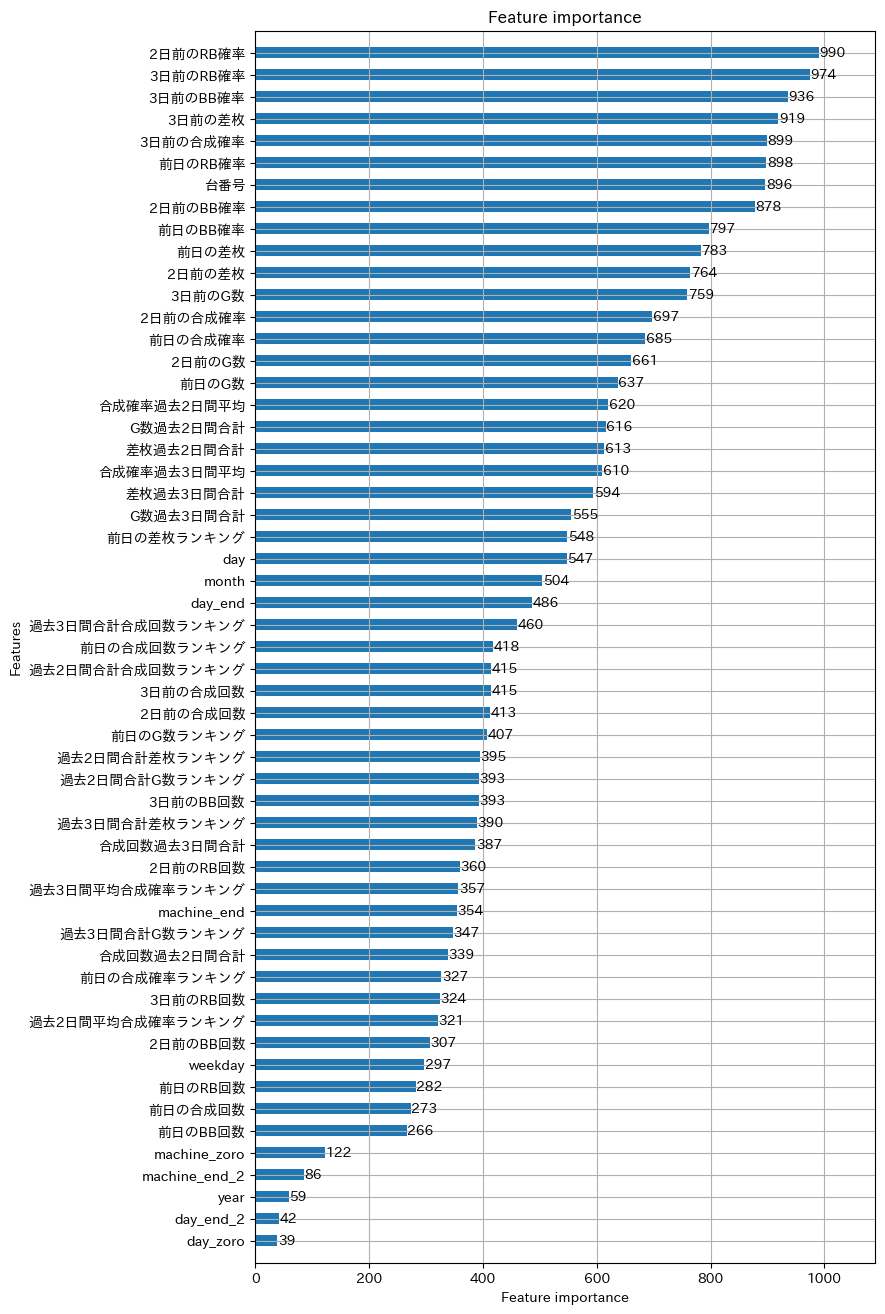

In [288]:
import optuna.integration.lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
import random

seed=random.randint(1, 100)
try:
    X_train = X_train.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', '合成回数', 'ブドウ確率'],axis=1)
    X_test = X_test.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', '合成回数','ブドウ確率'],axis=1)
except:
    pass
print(X_train.columns)
# 文字列と数値の対応を定義した辞書
mapping = {'アイムジャグラーEX-TP': 1, 'マイジャグラーV': 2, 'ファンキージャグラー2': 3, 'ハッピージャグラーVIII': 4}

#lightgbmを行うために各objectをint、floatに変換
for column in X_train.columns:
    if column=="機種名":
        # '機種名' 列をマップして置き換え
        X_train[column] = X_train[column].map(mapping)
        X_test[column] = X_test[column].map(mapping)
    if column in ['台番号', 'G数', '差枚', 'BB', 'RB', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2', 'day_zoro',
       'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚', '前日のG数']:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
    else:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# X_train["差枚"]=X_train["差枚"].astype(int)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
    'boosting_type': 'gbdt',
    'metric':'binary_error', # 評価指標 : 不正解率(1 - 正解率)
    # 'num_iterations':40,
    # 'num_leaves':5,
    # 'min_data_in_leaf':10,
    # 'min_child_samples': 10,  # ノードを分割するための最小サンプル数を増やす
    # 'min_child_weight': 0.001,  # ノードを分割するための最小の重み合計を増やす
    'class_weight':'balanced',
    'random_state':seed,
    'verbose': -1,
    'objective': 'binary',  # 2値分類を指定 
    # 'min_child_samples': 6,  # ノードを分割するための最小サンプル数を調整
    # 'metric': 'binary_logloss',  # ロジスティック損失を評価指標に指定
 }


model = lgb.train(lgb_params,
     train_set=lgb_train, # トレーニングデータの指定
     valid_sets=lgb_eval, # 検証データの指定
 )

# テストデータの予測 ((各クラスの予測確率 を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラスを返す)
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc, model.params)
lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [285]:
# 真値と予測値の表示
y_pred = np.where(y_pred < 0.5, 0, 1)
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# # 真値と予測確率の表示
# df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1]})
# display(df_pred_prob)


     機種名    台番号  day_end  機種台数   前日のG数   前日の差枚  前日のBB回数  前日のRB回数  前日の合成回数   
0    NaN  486.0      9.0  12.0  6738.0  -813.0     26.0     14.0     40.0  \
1    NaN  556.0      3.0  12.0     NaN     NaN      NaN      NaN      NaN   
2    NaN  554.0      6.0  12.0  2558.0  -467.0      7.0      8.0     15.0   
3    NaN  486.0      4.0  12.0     NaN     NaN      NaN      NaN      NaN   
4    NaN  487.0      0.0  12.0  5458.0 -1267.0     16.0     15.0     31.0   
5    NaN  551.0      3.0  12.0  3901.0  -600.0     13.0      9.0     22.0   
6    NaN  553.0      0.0  12.0  5155.0  1373.0     24.0     15.0     39.0   
7    NaN  556.0      4.0  12.0   560.0  -653.0      0.0      0.0      0.0   
8    NaN  487.0      5.0  12.0  3311.0 -1613.0      6.0      8.0     14.0   
9    NaN  551.0      2.0  12.0  3812.0 -1640.0      9.0      9.0     18.0   
10   NaN  490.0      8.0  12.0  1901.0 -1107.0      3.0      6.0      9.0   
11   NaN  489.0      3.0  12.0  5379.0  1025.0     26.0     11.0     37.0   

target  target_pred
0         1            0
1         0            0
2         0            0
3         0            0
4         0            0
5         0            0
6         0            0
7         0            0
8         0            0
9         0            0
10        0            0
11        0            0
12        0            0
13        0            0
14        0            0
15        0            0
16        0            0
17        0            0
18        0            0
19        0            0
20        0            0
21        1            0
22        0            0
23        0            0
24        0            0
25        0            0
26        0            0
27        0            0
28        0            0
29        0            0
30        0            0
31        0            0
32        0            0
33        0            0
34        0            0
35        0            0
36        0            0
37        0            0
38        0            0
39        0            0
40        0            0
41        0            0
42        0            0
43        0            0
44        0            0
45        0            0
46        0            0
47        0            0
48        0            0
49        0            0
50        0            0
51        1            0
52        0            0
53        0            0
54        0            0
55        0            0
56        0            0
57        0            0
58        0            0
59        0            0
60        0            0
61        0            0
62        0            0
63        0            0
64        0            0
65        0            0
66        0            0
67        0            0
68        0            0
69        0            0
70        0            0
71        0            0
72        0            0
73        0            0
74        0            0
75        0            0
76        0            0
77        0            0
78        0            0
79        1            0
80        0            0
81        0            0
82        0            0
83        0            0
84        1            1
85        1            0
86        0            0
87        0            0
88        0            0
89        0            0
90        0            0
91        0            0
92        0            0
93        0            0
94        0            0
95        0            0
96        0            0
97        0            0
98        0            0
99        0            0
100       0            0
101       0            0
102       0            0
103       0            0
104       0            0
105       0            0
106       0            0
107       0            0
108       0            0
109       0            0
110       0            0
111       0            0
112       0            0
113       1            0
114       0            0
115       0            0
116       0            0
117       0            0
118       0            0
119       0            0
120       0            0
121       0            0
122       0            0
123       0            0
124       0            0
125       0            0
126       0            0
127       0            0
128       0            0
129       0            0
130       0            0
131       0            0
132       0            0
133       1            0
134       1            0
135       0            0
136       0            0
137       0            0
138       0            0
139       0            0
140       0            0
141       0            0
142       0            0
143       0            0
144       0            0
145       0            0
146       0            0
147       0            0
148       0            0
149       0            0
150       0            0
151       0            0
152       0            0
153       0            0
154       1            0
155       0            0
156       0            0
157       0            0
158       0            0
159  

Acc : 0.9405034324942791
[[404   2]
 [ 24   7]]


<AxesSubplot:>

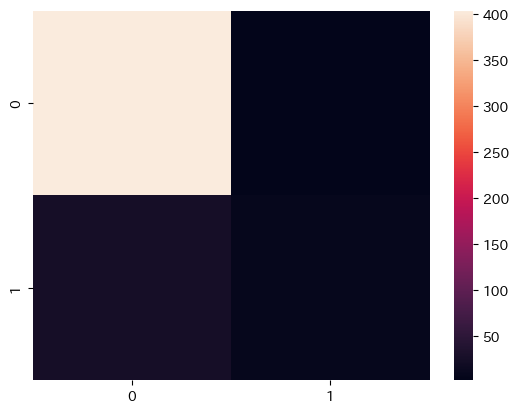

In [284]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)
# 混同行列の作成
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix)

Empty DataFrame
Columns: [日付, 機種名, 台番号, G数, 差枚, BB回数, RB回数, 合成確率, BB確率, RB確率, ブドウ確率, setting, day_end, 合成回数, 機種台数, 前日のG数, 前日の差枚, 前日のBB回数, 前日のRB回数, 前日の合成回数, 前日の合成確率, 前日のBB確率, 前日のRB確率, 前日のG数ランキング, 前日の差枚ランキング, 前日の合成回数ランキング, 前日の合成確率ランキング, 2日前のG数, 2日前の差枚, 2日前のBB回数, 2日前のRB回数, 2日前の合成回数, 2日前の合成確率, 2日前のBB確率, 2日前のRB確率, 3日前のG数, 3日前の差枚, 3日前のBB回数, 3日前のRB回数, 3日前の合成回数, 3日前の合成確率, 3日前のBB確率, 3日前のRB確率, G数過去2日間合計, 差枚過去2日間合計, 合成回数過去2日間合計, 合成確率過去2日間平均, G数過去3日間合計, 差枚過去3日間合計, 合成回数過去3日間合計, 合成確率過去3日間平均, 過去2日間合計G数ランキング, 過去2日間合計差枚ランキング, 過去2日間合計合成回数ランキング, 過去2日間平均合成確率ランキング, 過去3日間合計G数ランキング, 過去3日間合計差枚ランキング, 過去3日間合計合成回数ランキング, 過去3日間平均合成確率ランキング, year, month, day, weekday, day_end_2, day_zoro, machine_end, machine_end_2, machine_zoro, learning_setting]
Index: []

IndexError: At least one sheet must be visible

In [239]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.10.0 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 8.7 MB/s eta 0:00:00a 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
